# Data Extraction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


## Bangalore Dataset

In [ ]:
bangalore = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/bangalore_cars.csv')

In [ ]:
import ast

In [ ]:
bangalore.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
# Helper function to safely merge DataFrames with overlapping columns
def safe_concat(bangalore, new_df, prefix):
    overlapping_columns = [col for col in new_df.columns if col in bangalore.columns]
    if overlapping_columns:
        bangalore.drop(columns=overlapping_columns, inplace=True)
    new_df.columns = [f"{prefix}_{col}" if col in bangalore.columns else col for col in new_df.columns]
    return pd.concat([bangalore, new_df], axis=1)

# Column 1: Process 'new_car_detail'
bangalore["new_car_detail"] = bangalore["new_car_detail"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def extract_values(d):
    if isinstance(d, dict):
        return pd.Series(d)
    return pd.Series()
new_car_details_df = bangalore["new_car_detail"].apply(extract_values)
bangalore = safe_concat(bangalore, new_car_details_df, 'detail')
bangalore.drop(columns=["new_car_detail"], inplace=True)

# Column 2: Process 'new_car_overview'
bangalore["new_car_overview"] = bangalore["new_car_overview"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_top_values(row):
    new_dict = {}
    if isinstance(row, dict) and "top" in row and isinstance(row["top"], list):
        for item in row["top"]:
            if isinstance(item, dict) and "key" in item and "value" in item:
                new_dict[item["key"]] = item["value"]
    return pd.Series(new_dict)
new_car_overview_df = bangalore["new_car_overview"].apply(extract_top_values)
bangalore = safe_concat(bangalore, new_car_overview_df, 'overview')
bangalore.drop(columns=["new_car_overview"], inplace=True)

# Column 3: Process 'new_car_feature'
bangalore["new_car_feature"] = bangalore["new_car_feature"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_features(row):
    features = []
    if isinstance(row, dict):
        if "top" in row and isinstance(row["top"], list):
            for item in row["top"]:
                if isinstance(item, dict) and "value" in item:
                    features.append(str(item["value"]))
        if "data" in row and isinstance(row["data"], list):
            for category in row["data"]:
                if isinstance(category, dict) and "list" in category and isinstance(category["list"], list):
                    for item in category["list"]:
                        if isinstance(item, dict) and "value" in item:
                            features.append(str(item["value"]))
    return ", ".join(features)
bangalore["Feature"] = bangalore["new_car_feature"].apply(extract_features)
bangalore.drop(columns=["new_car_feature"], inplace=True)

# Column 4: Process 'new_car_specs'
def expand_specs(row):
    specs = ast.literal_eval(row)
    expanded_data = {}
    for item in specs['top']:
        key = item['key']
        value = item['value']
        expanded_data[key] = value
    for section in specs['data']:
        for item in section['list']:
            key = item['key']
            value = item['value']
            expanded_data[key] = value
    return pd.Series(expanded_data)
expanded_specs_df = bangalore['new_car_specs'].apply(expand_specs)
bangalore = safe_concat(bangalore, expanded_specs_df, 'specs')
bangalore.drop(columns=['new_car_specs'], inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'bangalore_ext.csv'
bangalore.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as '{csv_file_path}'.")


Excel file has been successfully converted to CSV and saved as 'bangalore_ext.csv'.


In [ ]:
bangalore = pd.read_csv('/content/bangalore_ext.csv')
bangalore.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Petrol,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,"Power Steering, Power Windows Front, Air Condi...",23.1 kmpl,998 CC,67.04bhp@6000rpm,90Nm,5.0,White,K10B Engine,998.0,90Nm@3500rpm,3.0,4.0,DOHC,MPFi,73 X 82 mm,11.0:1,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,1250kg,5 Speed,FWD,5.0,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN


## Chennai Dataset

In [ ]:
chennai = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/chennai_cars.csv')

In [ ]:
chennai.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
# Helper function to safely merge DataFrames with overlapping columns
def safe_concat(chennai, new_df, prefix):
    overlapping_columns = [col for col in new_df.columns if col in chennai.columns]
    if overlapping_columns:
        chennai.drop(columns=overlapping_columns, inplace=True)
    new_df.columns = [f"{prefix}_{col}" if col in chennai.columns else col for col in new_df.columns]
    return pd.concat([chennai, new_df], axis=1)

# Column 1: Process 'new_car_detail'
chennai["new_car_detail"] = chennai["new_car_detail"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def extract_values(d):
    if isinstance(d, dict):
        return pd.Series(d)
    return pd.Series()
new_car_details_df = chennai["new_car_detail"].apply(extract_values)
chennai = safe_concat(chennai, new_car_details_df, 'detail')
chennai.drop(columns=["new_car_detail"], inplace=True)

# Column 2: Process 'new_car_overview'
chennai["new_car_overview"] = chennai["new_car_overview"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_top_values(row):
    new_dict = {}
    if isinstance(row, dict) and "top" in row and isinstance(row["top"], list):
        for item in row["top"]:
            if isinstance(item, dict) and "key" in item and "value" in item:
                new_dict[item["key"]] = item["value"]
    return pd.Series(new_dict)
new_car_overview_df = chennai["new_car_overview"].apply(extract_top_values)
chennai = safe_concat(chennai, new_car_overview_df, 'overview')
chennai.drop(columns=["new_car_overview"], inplace=True)

# Column 3: Process 'new_car_feature'
chennai["new_car_feature"] = chennai["new_car_feature"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_features(row):
    features = []
    if isinstance(row, dict):
        if "top" in row and isinstance(row["top"], list):
            for item in row["top"]:
                if isinstance(item, dict) and "value" in item:
                    features.append(str(item["value"]))
        if "data" in row and isinstance(row["data"], list):
            for category in row["data"]:
                if isinstance(category, dict) and "list" in category and isinstance(category["list"], list):
                    for item in category["list"]:
                        if isinstance(item, dict) and "value" in item:
                            features.append(str(item["value"]))
    return ", ".join(features)
chennai["Feature"] = chennai["new_car_feature"].apply(extract_features)
chennai.drop(columns=["new_car_feature"], inplace=True)

# Column 4: Process 'new_car_specs'
def expand_specs(row):
    specs = ast.literal_eval(row)
    expanded_data = {}
    for item in specs['top']:
        key = item['key']
        value = item['value']
        expanded_data[key] = value
    for section in specs['data']:
        for item in section['list']:
            key = item['key']
            value = item['value']
            expanded_data[key] = value
    return pd.Series(expanded_data)
expanded_specs_df = chennai['new_car_specs'].apply(expand_specs)
chennai = safe_concat(chennai, expanded_specs_df, 'specs')
chennai.drop(columns=['new_car_specs'], inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'chennai_ext.csv'
chennai.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as '{csv_file_path}'.")


Excel file has been successfully converted to CSV and saved as 'chennai_ext.csv'.


In [ ]:
chennai = pd.read_csv('/content/chennai_ext.csv')
chennai.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2022,Third Party insurance,Petrol,"20,000 Kms",TN02,First Owner,998 cc,Automatic,2022,"Power Steering, Power Windows Front, Air Condi...",998 CC,118.36bhp@6000rpm,172nm,16,5,Black,Smartstream G1.0 T - GDi,998,172nm@1500-4000rpm,3.0,4.0,GDi,Yes,3995mm,1790,1642,2500,1465,7-Speed DCT,FWD,5,Electric,Disc,Drum,"Tubeless, Radial",16,5,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Delhi Dataset

In [ ]:
delhi = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/delhi_cars.csv')
delhi.head(1)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
# Helper function to safely merge DataFrames with overlapping columns
def safe_concat(delhi, new_df, prefix):
    overlapping_columns = [col for col in new_df.columns if col in delhi.columns]
    if overlapping_columns:
        delhi.drop(columns=overlapping_columns, inplace=True)
    new_df.columns = [f"{prefix}_{col}" if col in delhi.columns else col for col in new_df.columns]
    return pd.concat([delhi, new_df], axis=1)

# Column 1: Process 'new_car_detail'
delhi["new_car_detail"] = delhi["new_car_detail"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def extract_values(d):
    if isinstance(d, dict):
        return pd.Series(d)
    return pd.Series()
new_car_details_df = delhi["new_car_detail"].apply(extract_values)
delhi = safe_concat(delhi, new_car_details_df, 'detail')
delhi.drop(columns=["new_car_detail"], inplace=True)

# Column 2: Process 'new_car_overview'
delhi["new_car_overview"] = delhi["new_car_overview"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_top_values(row):
    new_dict = {}
    if isinstance(row, dict) and "top" in row and isinstance(row["top"], list):
        for item in row["top"]:
            if isinstance(item, dict) and "key" in item and "value" in item:
                new_dict[item["key"]] = item["value"]
    return pd.Series(new_dict)
new_car_overview_df = delhi["new_car_overview"].apply(extract_top_values)
delhi = safe_concat(delhi, new_car_overview_df, 'overview')
delhi.drop(columns=["new_car_overview"], inplace=True)

# Column 3: Process 'new_car_feature'
delhi["new_car_feature"] = delhi["new_car_feature"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_features(row):
    features = []
    if isinstance(row, dict):
        if "top" in row and isinstance(row["top"], list):
            for item in row["top"]:
                if isinstance(item, dict) and "value" in item:
                    features.append(str(item["value"]))
        if "data" in row and isinstance(row["data"], list):
            for category in row["data"]:
                if isinstance(category, dict) and "list" in category and isinstance(category["list"], list):
                    for item in category["list"]:
                        if isinstance(item, dict) and "value" in item:
                            features.append(str(item["value"]))
    return ", ".join(features)
delhi["Feature"] = delhi["new_car_feature"].apply(extract_features)
delhi.drop(columns=["new_car_feature"], inplace=True)

# Column 4: Process 'new_car_specs'
def expand_specs(row):
    specs = ast.literal_eval(row)
    expanded_data = {}
    for item in specs['top']:
        key = item['key']
        value = item['value']
        expanded_data[key] = value
    for section in specs['data']:
        for item in section['list']:
            key = item['key']
            value = item['value']
            expanded_data[key] = value
    return pd.Series(expanded_data)
expanded_specs_df = delhi['new_car_specs'].apply(expand_specs)
delhi = safe_concat(delhi, expanded_specs_df, 'specs')
delhi.drop(columns=['new_car_specs'], inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'delhi_ext.csv'
delhi.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as '{csv_file_path}'.")

Excel file has been successfully converted to CSV and saved as 'delhi_ext.csv'.


In [ ]:
delhi = pd.read_csv('/content/delhi_ext.csv')
delhi.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Ownership,Engine Displacement,Transmission,Year of Manufacture,RTO,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Value Configuration,Super Charger,Turning Radius,Top Speed,Acceleration,Gross Weight,Front Tread,Rear Tread,BoreX Stroke,Compression Ratio,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2022,Third Party insurance,Diesel,"10,000 Kms",First Owner,1493 cc,Automatic,2022,NaN,"Power Steering, Power Windows Front, Air Condi...",18 kmpl,1493 CC,113.43bhp@4000rpm,250Nm,17,5.0,Gray,1.5 L CRDi VGT,1493,250Nm@1500-2750rpm,4.0,4.0,CRDi,Yes,4315mm,1800mm,1645mm,2610mm,1540,6-Speed,FWD,5.0,Electric,Disc,Disc,"Tubeless, Radial",17,5.0,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Hyderabad Database

In [ ]:
hyderabad = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/hyderabad_cars.csv')
hyderabad.head(1)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
# Helper function to safely merge DataFrames with overlapping columns
def safe_concat(hyderabad, new_df, prefix):
    overlapping_columns = [col for col in new_df.columns if col in hyderabad.columns]
    if overlapping_columns:
        hyderabad.drop(columns=overlapping_columns, inplace=True)
    new_df.columns = [f"{prefix}_{col}" if col in hyderabad.columns else col for col in new_df.columns]
    return pd.concat([hyderabad, new_df], axis=1)

# Column 1: Process 'new_car_detail'
hyderabad["new_car_detail"] = hyderabad["new_car_detail"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def extract_values(d):
    if isinstance(d, dict):
        return pd.Series(d)
    return pd.Series()
new_car_details_df = hyderabad["new_car_detail"].apply(extract_values)
hyderabad = safe_concat(hyderabad, new_car_details_df, 'detail')
hyderabad.drop(columns=["new_car_detail"], inplace=True)

# Column 2: Process 'new_car_overview'
hyderabad["new_car_overview"] = hyderabad["new_car_overview"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_top_values(row):
    new_dict = {}
    if isinstance(row, dict) and "top" in row and isinstance(row["top"], list):
        for item in row["top"]:
            if isinstance(item, dict) and "key" in item and "value" in item:
                new_dict[item["key"]] = item["value"]
    return pd.Series(new_dict)
new_car_overview_df = hyderabad["new_car_overview"].apply(extract_top_values)
hyderabad = safe_concat(hyderabad, new_car_overview_df, 'overview')
hyderabad.drop(columns=["new_car_overview"], inplace=True)

# Column 3: Process 'new_car_feature'
hyderabad["new_car_feature"] = hyderabad["new_car_feature"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_features(row):
    features = []
    if isinstance(row, dict):
        if "top" in row and isinstance(row["top"], list):
            for item in row["top"]:
                if isinstance(item, dict) and "value" in item:
                    features.append(str(item["value"]))
        if "data" in row and isinstance(row["data"], list):
            for category in row["data"]:
                if isinstance(category, dict) and "list" in category and isinstance(category["list"], list):
                    for item in category["list"]:
                        if isinstance(item, dict) and "value" in item:
                            features.append(str(item["value"]))
    return ", ".join(features)
hyderabad["Feature"] = hyderabad["new_car_feature"].apply(extract_features)
hyderabad.drop(columns=["new_car_feature"], inplace=True)

# Column 4: Process 'new_car_specs'
def expand_specs(row):
    specs = ast.literal_eval(row)
    expanded_data = {}
    for item in specs['top']:
        key = item['key']
        value = item['value']
        expanded_data[key] = value
    for section in specs['data']:
        for item in section['list']:
            key = item['key']
            value = item['value']
            expanded_data[key] = value
    return pd.Series(expanded_data)
expanded_specs_df = hyderabad['new_car_specs'].apply(expand_specs)
hyderabad = safe_concat(hyderabad, expanded_specs_df, 'specs')
hyderabad.drop(columns=['new_car_specs'], inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'hyderabad_ext.csv'
hyderabad.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as '{csv_file_path}'.")


Excel file has been successfully converted to CSV and saved as 'hyderabad_ext.csv'.


In [ ]:
hyderabad = pd.read_csv('/content/hyderabad_ext.csv')
hyderabad.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,7746,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2022,Third Party insurance,Petrol,"20,000 Kms",TS04,First Owner,999 cc,Automatic,2022.0,"Power Steering, Power Windows Front, Air Condi...",16.47 kmpl,999 CC,108.62bhp@5000-5500rpm,175nm,R16,5,Others,1.0L TSI Petrol,999.0,175nm@1750-4000rpm,3.0,4.0,DOHC,TSI,74.5x76.4 mm,10.5:1,Yes,No,3971mm,1682mm,1469mm,2470mm,1457mm,1500mm,1106,1570,6 Speed,FWD,5,Electronic,4.9,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN


## Jaipur Dataset

In [ ]:
jaipur = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/jaipur_cars.csv')
jaipur.head(1)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
# Helper function to safely merge DataFrames with overlapping columns
def safe_concat(jaipur, new_df, prefix):
    overlapping_columns = [col for col in new_df.columns if col in jaipur.columns]
    if overlapping_columns:
        jaipur.drop(columns=overlapping_columns, inplace=True)
    new_df.columns = [f"{prefix}_{col}" if col in jaipur.columns else col for col in new_df.columns]
    return pd.concat([jaipur, new_df], axis=1)

# Column 1: Process 'new_car_detail'
jaipur["new_car_detail"] = jaipur["new_car_detail"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def extract_values(d):
    if isinstance(d, dict):
        return pd.Series(d)
    return pd.Series()
new_car_details_df = jaipur["new_car_detail"].apply(extract_values)
jaipur = safe_concat(jaipur, new_car_details_df, 'detail')
jaipur.drop(columns=["new_car_detail"], inplace=True)

# Column 2: Process 'new_car_overview'
jaipur["new_car_overview"] = jaipur["new_car_overview"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_top_values(row):
    new_dict = {}
    if isinstance(row, dict) and "top" in row and isinstance(row["top"], list):
        for item in row["top"]:
            if isinstance(item, dict) and "key" in item and "value" in item:
                new_dict[item["key"]] = item["value"]
    return pd.Series(new_dict)
new_car_overview_df = jaipur["new_car_overview"].apply(extract_top_values)
jaipur = safe_concat(jaipur, new_car_overview_df, 'overview')
jaipur.drop(columns=["new_car_overview"], inplace=True)

# Column 3: Process 'new_car_feature'
jaipur["new_car_feature"] = jaipur["new_car_feature"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_features(row):
    features = []
    if isinstance(row, dict):
        if "top" in row and isinstance(row["top"], list):
            for item in row["top"]:
                if isinstance(item, dict) and "value" in item:
                    features.append(str(item["value"]))
        if "data" in row and isinstance(row["data"], list):
            for category in row["data"]:
                if isinstance(category, dict) and "list" in category and isinstance(category["list"], list):
                    for item in category["list"]:
                        if isinstance(item, dict) and "value" in item:
                            features.append(str(item["value"]))
    return ", ".join(features)
jaipur["Feature"] = jaipur["new_car_feature"].apply(extract_features)
jaipur.drop(columns=["new_car_feature"], inplace=True)

# Column 4: Process 'new_car_specs'
def expand_specs(row):
    specs = ast.literal_eval(row)
    expanded_data = {}
    for item in specs['top']:
        key = item['key']
        value = item['value']
        expanded_data[key] = value
    for section in specs['data']:
        for item in section['list']:
            key = item['key']
            value = item['value']
            expanded_data[key] = value
    return pd.Series(expanded_data)
expanded_specs_df = jaipur['new_car_specs'].apply(expand_specs)
jaipur = safe_concat(jaipur, expanded_specs_df, 'specs')
jaipur.drop(columns=['new_car_specs'], inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'jaipur_ext.csv'
jaipur.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as '{csv_file_path}'.")


Excel file has been successfully converted to CSV and saved as 'jaipur_ext.csv'.


In [ ]:
jaipur = pd.read_csv('/content/jaipur_ext.csv')
jaipur.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Gross Weight,BoreX Stroke,Compression Ratio,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Diesel,"1,20,000 Kms",RJ13,Second Owner,1396 cc,Manual,2015.0,"Power Steering, Power Windows Front, Air Condi...",22.54 kmpl,1396 CC,88.73bhp@4000rpm,219.7Nm,16,5.0,Others,U2 CRDI Diesel Engine,1396,219.7Nm@1500-2750rpm,4.0,4.0,DOHC,CRDI,Yes,No,3985mm,1734mm,1505mm,2570mm,1505mm,1503mm,1515kg,6 Speed,FWD,5.0,Power,5.2 metres,Disc,Drum,180 Kmph,11.9 Seconds,Tubeless,16,5.0,295-litres,NaN,NaN,NaN,NaN


## Kolkata Dataset

In [ ]:
kolkata = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/kolkata_cars.csv')
kolkata.head(1)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
# Helper function to safely merge DataFrames with overlapping columns
def safe_concat(kolkata, new_df, prefix):
    overlapping_columns = [col for col in new_df.columns if col in kolkata.columns]
    if overlapping_columns:
        kolkata.drop(columns=overlapping_columns, inplace=True)
    new_df.columns = [f"{prefix}_{col}" if col in kolkata.columns else col for col in new_df.columns]
    return pd.concat([kolkata, new_df], axis=1)

# Column 1: Process 'new_car_detail'
kolkata["new_car_detail"] = kolkata["new_car_detail"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def extract_values(d):
    if isinstance(d, dict):
        return pd.Series(d)
    return pd.Series()
new_car_details_df = kolkata["new_car_detail"].apply(extract_values)
kolkata = safe_concat(kolkata, new_car_details_df, 'detail')
kolkata.drop(columns=["new_car_detail"], inplace=True)

# Column 2: Process 'new_car_overview'
kolkata["new_car_overview"] = kolkata["new_car_overview"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_top_values(row):
    new_dict = {}
    if isinstance(row, dict) and "top" in row and isinstance(row["top"], list):
        for item in row["top"]:
            if isinstance(item, dict) and "key" in item and "value" in item:
                new_dict[item["key"]] = item["value"]
    return pd.Series(new_dict)
new_car_overview_df = kolkata["new_car_overview"].apply(extract_top_values)
kolkata = safe_concat(kolkata, new_car_overview_df, 'overview')
kolkata.drop(columns=["new_car_overview"], inplace=True)

# Column 3: Process 'new_car_feature'
kolkata["new_car_feature"] = kolkata["new_car_feature"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else {})
def extract_features(row):
    features = []
    if isinstance(row, dict):
        if "top" in row and isinstance(row["top"], list):
            for item in row["top"]:
                if isinstance(item, dict) and "value" in item:
                    features.append(str(item["value"]))
        if "data" in row and isinstance(row["data"], list):
            for category in row["data"]:
                if isinstance(category, dict) and "list" in category and isinstance(category["list"], list):
                    for item in category["list"]:
                        if isinstance(item, dict) and "value" in item:
                            features.append(str(item["value"]))
    return ", ".join(features)
kolkata["Feature"] = kolkata["new_car_feature"].apply(extract_features)
kolkata.drop(columns=["new_car_feature"], inplace=True)

# Column 4: Process 'new_car_specs'
def expand_specs(row):
    specs = ast.literal_eval(row)
    expanded_data = {}
    for item in specs['top']:
        key = item['key']
        value = item['value']
        expanded_data[key] = value
    for section in specs['data']:
        for item in section['list']:
            key = item['key']
            value = item['value']
            expanded_data[key] = value
    return pd.Series(expanded_data)
expanded_specs_df = kolkata['new_car_specs'].apply(expand_specs)
kolkata = safe_concat(kolkata, expanded_specs_df, 'specs')
kolkata.drop(columns=['new_car_specs'], inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'kolkata_ext.csv'
kolkata.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as '{csv_file_path}'.")


Excel file has been successfully converted to CSV and saved as 'kolkata_ext.csv'.


In [ ]:
kolkata = pd.read_csv('/content/kolkata_ext.csv')
kolkata.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Ground Clearance Unladen,Cargo Volumn,Compression Ratio,Acceleration,Top Speed
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2014,Third Party insurance,Petrol,"70,000 Kms",WB02,Third Owner,2494 cc,Automatic,2014.0,"Power Steering, Power Windows Front, Air Condi...",19.16 kmpl,2494 CC,158.2bhp@5700rpm,213Nm,17,5.0,White,2AR FXE Petrol Engine,2494,213Nm@4500rpm,4.0,4.0,DOHC,Electronic Fuel Injection(EFI),90 X 98 mm,No,No,4825mm,1825mm,1480mm,2775mm,1580mm,1570mm,1625kg,2100kg,6 Speed,FWD,5.0,Power,5.5 metres,Ventilated Disc,Solid Disc,"Tubeless,Radial",17,4.0,NaN,NaN,NaN,NaN,NaN


# Data Implementation of the Extracted Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bangalore = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/Extracted Dataset/bangalore_ext.csv')
chennai = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/Extracted Dataset/chennai_ext.csv')
delhi = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/Extracted Dataset/delhi_ext.csv')
hyderabad = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/Extracted Dataset/hyderabad_ext.csv')
jaipur = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/Extracted Dataset/jaipur_ext.csv')
kolkata = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/Extracted Dataset/kolkata_ext.csv')




1. ** There are so many columns in this dataset**
2. ** Getting only the important feature for efficiency of the model**







>*Car Links, IT, FT, BT, KM, Transmission, Owner Number, Owner, OEM, Model, Model Year, Central Variant ID, Variant Name, Price, Actual Price, Price Saving, Fixed Price Text, Trending Text, Registration Year, Insurance Validity, Fuel Type, Kilometers Driven, RTO, Ownership, Engine Displacement, Transmission Type, Year of Manufacture, Feature, Mileage, Engine, Maximum Power, Torque, Wheel Size, Seats, Color, Engine Type, Displacement, Maximum Torque, Number of Cylinders, Values per Cylinder, Valve Configuration, Fuel Supply System, Bore x Stroke, Compression Ratio, Turbocharger, Supercharger, Length, Width, Height, Wheelbase, Front Tread, Rear Tread, Kerb Weight, Gross Weight, Gearbox, Drive Type, Seating Capacity, Steering Type, Turning Radius, Front Brake Type, Rear Brake Type, Tire Type, Alloy Wheel Size, Number of Doors, Cargo Volume, Top Speed, Acceleration, Ground Clearance (Unladen)*





## Data Cleaning

            Fuel Type
            Body Type
            Mileage (km)
            Transmission Type
            Number of Owners
            OEM
            Car Model
            Model Year
            Central Variant ID
            Variant Name
            Price
            Top Key Value
            Mileage
            Engine
            Max Power
            Torque
            Seats

### Bangalore

In [ ]:
bangalore.sample(15)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
1240,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"55,127",Automatic,1,1st Owner,Maruti,Maruti Baleno,2017,3964,1.2 CVT Delta,₹ 6.43 Lakh,₹ 6.55 Lakh,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Apr 2017,Comprehensive,Petrol,"55,127 Kms",KA03,First Owner,1197 cc,Automatic,2017.0,"Power Steering, Power Windows Front, Air Condi...",21.4 kmpl,1197 CC,83.1bhp@6000rpm,115Nm,5.0,Red,VVT Petrol Engine,1197.0,115Nm@4000rpm,4.0,4.0,DOHC,MPFI,NaN,NaN,No,No,3995mm,1745mm,1510mm,2520mm,1515mm,1525mm,910kg,1360kg,CVT,FWD,5.0,Power,4.9 meters,Disc,Drum,180 Kmph,12.79 seconds,"Tubeless,Radial",5.0,339-litres,NaN,NaN,NaN
985,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"21,193",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,5604,1.2 Kappa Sportz BSIV,₹ 5.17 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Jun 2017,Comprehensive,Petrol,"21,193 Kms",KA01,First Owner,1197 cc,Manual,2017.0,"Power Steering, Power Windows Front, Air Condi...",18.9 kmpl,1197 CC,81.86bhp@6000rpm,113.75nm,5.0,Blue,Kappa VTVT Petrol Engine,1197.0,113.75nm@4000rpm,4.0,4.0,DOHC,MPFI,NaN,NaN,No,No,3765mm,1660mm,1520mm,2425mm,1479mm,1493mm,1120,NaN,5 Speed,FWD,5.0,Power,4.8 metres,Disc,Drum,165 Kmph,12.9 Seconds,Tubeless,5.0,256,NaN,NaN,NaN
1209,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Sedan,"1,02,662",Automatic,1,1st Owner,Honda,Honda City,2014,1217,i VTEC CVT VX,₹ 5.20 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Nov 2014,Comprehensive,Petrol,"1,02,662 Kms",KA02,First Owner,1497 cc,Automatic,2014.0,"Power Steering, Power Windows Front, Air Condi...",18 kmpl,1497 CC,117.3bhp@6600rpm,145Nm,5.0,TITANIUM GREY,i VTEC Engine,1497.0,145Nm@4600rpm,4.0,4.0,SOHC,PGM-Fi,73.0 X 89.4 mm,10.3:1,No,No,4440mm,1695mm,1495mm,2600mm,1480mm,1465mm,1085kg,NaN,5 Speed CVT,FWD,5.0,Power,5.3 metres,Disc,Drum,195 Kmph,10 Seconds,"Tubeless,Radial",4.0,510-litres,15,15,NaN
683,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"20,000",Manual,1,1st Owner,Volkswagen,Volkswagen Polo,2022,7745,1.0 TSI Highline Plus,₹ 10.75 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2022,Third Party insurance,Petrol,"20,000 Kms",KA04,First Owner,999 cc,Manual,2022.0,"Power Steering, Power Windows Front, Air Condi...",18.24 kmpl,999 CC,108.62bhp@5000-5500rpm,175nm,5.0,Others,1.0L TSI Petrol,999.0,175nm@1750-4000rpm,3.0,4.0,DOHC,TSI,74.5x76.4 mm,10.5:1,Yes,No,3971mm,1682mm,1469mm,2470mm,1457mm,1500mm,1072Kg,1530,6 Speed,FWD,5.0,Electronic,4.9,Disc,Drum,NaN,NaN,"Tubeless,Radial",5.0,280,R16,R16,NaN
1324,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"46,000",Manual,2,2nd Owner,Tata,Tata Nexon,2017,5994,1.2 Revotron XZ Plus,₹ 7.25 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Jun 2017,Comprehensive,Petrol,"46,000 Kms",KA06,Second Owner,1198 cc,Manual,2017.0,"Power Steering, Power Windows Front, Air Condi...",17 kmpl,1198 CC,108.5bhp@5000rpm,170Nm,5.0,Red,Revotron 1.2L Turbocharged engine,1198.0,170Nm@1750-4000rpm,3.0,4.0,DOHC,MPFI,77x85.8,NaN,Yes,No,3994mm,1811mm,1607mm,2498mm,1540 mm,1530 mm,1252Kg,NaN,6 Speed,FWD,5.0,Power,5.1m,Disc,Drum,154.1

In [ ]:
bangalore.loc[10, ['Max Power', 'Torque']]

,10
Max Power,83.1bhp@6000rpm
Torque,115Nm


In [ ]:
bangalore['Max Power'] = bangalore['Max Power'].str.split('@').str[0].str.strip()
bangalore['Max Power']

,Max Power
0,67.04bhp
1,121.31bhp
2,84bhp
3,81.86bhp
4,88.5bhp
...,...
1476,168.5bhp
1477,104.68
1478,86.8bhp
1479,88.73bhp


In [ ]:
bangalore.columns

Index(['car_links', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven',
       'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Feature', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Seats', 'Color', 'Engine Type', 'Displacement', 'Max Torque',
       'No of Cylinder', 'Values per Cylinder', 'Value Configuration',
       'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Seating Capacity',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
 

In [ ]:
bangalore = bangalore.rename(columns={
    'ft': 'Fuel_Type',
    'bt': 'Body_Type',
    'km': 'Mileage_km',
    'transmission': 'Transmission_type',
    'ownerNo': 'Number_owner',
    'oem': 'oem',
    'model': 'Car_model',
    'modelYear': 'modelYear',
    'variantName': 'variantName',
    'price': 'price',
    'Mileage': 'Mileage',
    'Engine': 'Engine',
    'Max Power': 'Max Power',
    'Torque': 'Torque',
    'Seats': 'Seats'
})

In [ ]:
bangalore = bangalore[
    ['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type', 'Number_owner',
     'oem', 'Car_model', 'modelYear', 'variantName', 'price',
     'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
]

In [ ]:
bangalore.head(1)

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,23.1 kmpl,998 CC,67.04bhp,90Nm,5.0


In [ ]:
bangalore.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
for col in ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']:
    bangalore[col] = bangalore[col].fillna(bangalore[col].mode()[0])


In [ ]:
bangalore.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
bangalore.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,23.1 kmpl,998 CC,67.04bhp,90Nm,5.0
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,17 kmpl,1497 CC,121.31bhp,150Nm,5.0
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh,23.84 kmpl,1199 CC,84bhp,114Nm,5.0
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,₹ 4.62 Lakh,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5.0
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,₹ 7.90 Lakh,23.65 kmpl,1248 CC,88.5bhp,200Nm,5.0


In [ ]:
# Changing price ---> text into number
bangalore['price'] = bangalore['price'].apply(
    lambda x: float(x.replace(',', '').split(' ')[1]) * 100000 if isinstance(x, str) else x
)


In [ ]:
bangalore['price']

,price
0,400000.0
1,811000.0
2,585000.0
3,462000.0
4,790000.0
...,...
1476,1649000.0
1477,330000.0
1478,425000.0
1479,750000.0


In [ ]:
for col in bangalore.columns:
    print(f"Unique values in column '{col}':")
    print(bangalore[col].unique())
    print("-" * 20)


Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Lpg' 'Cng' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Pickup Trucks'
 'Convertibles']
--------------------
Unique values in column 'Mileage_km':
['1,20,000' '32,706' '11,949' '17,794' '60,000' '20,000' '37,772' '30,000'
 '37,000' '50,000' '24,887' '23,000' '48,928' '1,08,862' '80,000' '16,000'
 '65,376' '10,000' '67,000' '1,00,000' '18,083' '57,634' '1,10,000'
 '23,447' '33,000' '87,667' '40,000' '79,012' '31,344' '12,434' '12,000'
 '40,987' '18,157' '89,667' '56,997' '59,000' '18,835' '60,932' '33,539'
 '66,837' '400' '44,285' '25,000' '36,735' '79,000' '53,645' '53,982'
 '37,741' '17,367' '94,000' '33,700' '54,601' '64,000' '40,525' '44,154'
 '70,000' '68,039' '49,873' '90,000' '48,960' '68,000' '23,017' '83,000'
 '92,000' '62,139' '74,000' '26,500' '81,716' '24,000' '18,000' '38,197'
 '19,000' '14,000' '29,268' '64,374' '7,100' '43,679' '40,562' '5

In [ ]:
bangalore['Mileage_km'] = bangalore['Mileage_km'].str.replace(',', '')
bangalore['Engine'] = bangalore['Engine'].str.replace(' CC', '')
bangalore['Mileage'] = bangalore['Mileage'].str.replace(r'\s*kmpl', '', regex=True)

bangalore['Max Power'] = bangalore['Max Power'].str.replace(r'\s*KW', '', case=False, regex=True)
bangalore['Max Power'] = bangalore['Max Power'].str.replace(r'\s*PS', '', case=False, regex=True)
bangalore['Max Power'] = bangalore['Max Power'].str.replace(r'\s*bhp', '', case=False, regex=True)


bangalore['Torque'] = bangalore['Torque'].str.replace(r'\s*NM', '', regex=True)
bangalore['Torque'] = bangalore['Torque'].str.replace(r'\s*Nm', '', regex=True)
bangalore['Torque'] = bangalore['Torque'].str.replace(r'\s*nm', '', regex=True)

bangalore

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,23.1,998,67.04,90,5.0
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,17,1497,121.31,150,5.0
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000.0,23.84,1199,84,114,5.0
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000.0,19.1,1197,81.86,113.75,5.0
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000.0,23.65,1248,88.5,200,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,Diesel,SUV,156039,Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,1649000.0,12.55,2982,168.5,343,7.0
1477,Petrol,Sedan,56000,Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,330000.0,15,1586,104.68,145,5.0
1478,Petrol,Hatchback,42000,Manual,2,Honda,Honda Brio,2014,S MT,425000.0,19.4,1198,86.8,109,5.0
1479,Diesel,Hatchback,93003,Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,750000.0,22.54,1396,88.73,219.7,5.0


In [ ]:
for col in bangalore.columns:
    print(f"Unique values in column '{col}':")
    print(bangalore[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Lpg' 'Cng' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Pickup Trucks'
 'Convertibles']
--------------------
Unique values in column 'Mileage_km':
['120000' '32706' '11949' '17794' '60000' '20000' '37772' '30000' '37000'
 '50000' '24887' '23000' '48928' '108862' '80000' '16000' '65376' '10000'
 '67000' '100000' '18083' '57634' '110000' '23447' '33000' '87667' '40000'
 '79012' '31344' '12434' '12000' '40987' '18157' '89667' '56997' '59000'
 '18835' '60932' '33539' '66837' '400' '44285' '25000' '36735' '79000'
 '53645' '53982' '37741' '17367' '94000' '33700' '54601' '64000' '40525'
 '44154' '70000' '68039' '49873' '90000' '48960' '68000' '23017' '83000'
 '92000' '62139' '74000' '26500' '81716' '24000' '18000' '38197' '19000'
 '14000' '29268' '64374' '7100' '43679' '40562' '58600' '42050' '65017'
 '36349' '83394' '52204' '89000' '29813' '13345' '17100' '75

In [ ]:
bangalore.isnull().sum( )

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1481 non-null   object 
 1   Body_Type          1481 non-null   object 
 2   Mileage_km         1481 non-null   object 
 3   Transmission_type  1481 non-null   object 
 4   Number_owner       1481 non-null   int64  
 5   oem                1481 non-null   object 
 6   Car_model          1481 non-null   object 
 7   modelYear          1481 non-null   int64  
 8   variantName        1481 non-null   object 
 9   price              1481 non-null   float64
 10  Mileage            1481 non-null   object 
 11  Engine             1481 non-null   object 
 12  Max Power          1481 non-null   object 
 13  Torque             1481 non-null   object 
 14  Seats              1481 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 173.7+ KB


In [ ]:
bangalore['Mileage'] = pd.to_numeric(bangalore['Mileage'], errors='coerce')
bangalore['Engine'] = pd.to_numeric(bangalore['Engine'], errors='coerce')
bangalore['Max Power'] = pd.to_numeric(bangalore['Max Power'], errors='coerce')
bangalore['Torque'] = pd.to_numeric(bangalore['Torque'], errors='coerce')
bangalore['Seats'] = pd.to_numeric(bangalore['Seats'], errors='coerce')

In [ ]:
bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1481 non-null   object 
 1   Body_Type          1481 non-null   object 
 2   Mileage_km         1481 non-null   object 
 3   Transmission_type  1481 non-null   object 
 4   Number_owner       1481 non-null   int64  
 5   oem                1481 non-null   object 
 6   Car_model          1481 non-null   object 
 7   modelYear          1481 non-null   int64  
 8   variantName        1481 non-null   object 
 9   price              1481 non-null   float64
 10  Mileage            1479 non-null   float64
 11  Engine             1481 non-null   int64  
 12  Max Power          1463 non-null   float64
 13  Torque             1459 non-null   float64
 14  Seats              1481 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 173.7+ KB


In [ ]:
bangalore.sample(15)

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
21,Petrol,Hatchback,18083,Manual,1,Maruti,Maruti Swift,2016,VXI,582000.0,22.38,1197,88.50,113.00,5.0
1093,Diesel,SUV,120000,Automatic,1,Audi,Audi Q7,2011,3.0 TDI quattro,2000000.0,12.07,2967,241.40,550.00,7.0
793,Diesel,SUV,80000,Automatic,2,Mahindra,Mahindra XUV500,2016,AT W8 1.99 mHawk,900000.0,16.00,1997,140.00,320.00,7.0
763,Diesel,MUV,61000,Manual,2,Mahindra,Mahindra Xylo,2012,E8 ABS Airbag BSIV,465000.0,14.00,2498,NaN,NaN,7.0
243,Petrol,Hatchback,39959,Manual,1,Maruti,Maruti Baleno,2016,1.2 Zeta,681000.0,21.40,1197,83.10,115.00,5.0
601,Electric,SUV,10000,Automatic,1,Tata,Tata Nexon EV Max,2023,XZ Plus Lux,1800000.0,18.90,0,141.04,250.00,5.0
1090,Diesel,Sedan,90000,Manual,1,Hyundai,Hyundai Elantra,2014,CRDi SX,700000.0,22.70,1582,126.24,259.87,5.0
993,Petrol,SUV,40000,Automatic,2,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus DualTone,925000.0,17.00,1198,108.50,170.00,5.0
399,Petrol,Sedan,70000,Manual,1,Hyundai,Hyundai Verna,2019,VTVT 1.6 SX,900000.0,17.00,1591,121.30,151.00,5.0
541,Diesel,SUV,78536,Manual,1,Maruti,Maruti Vitara Brezza,2016,VDi Option,740000.0,24.30,1248,88.50,200.00,5.0


In [ ]:
# bangalore['Mileage_km'] = pd.to_numeric(bangalore['Mileage_km'], errors='coerce')

In [ ]:
bangalore.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
for col in bangalore.columns:
    print(f"Unique values in column '{col}':")
    print(bangalore[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Lpg' 'Cng' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Pickup Trucks'
 'Convertibles']
--------------------
Unique values in column 'Mileage_km':
['120000' '32706' '11949' '17794' '60000' '20000' '37772' '30000' '37000'
 '50000' '24887' '23000' '48928' '108862' '80000' '16000' '65376' '10000'
 '67000' '100000' '18083' '57634' '110000' '23447' '33000' '87667' '40000'
 '79012' '31344' '12434' '12000' '40987' '18157' '89667' '56997' '59000'
 '18835' '60932' '33539' '66837' '400' '44285' '25000' '36735' '79000'
 '53645' '53982' '37741' '17367' '94000' '33700' '54601' '64000' '40525'
 '44154' '70000' '68039' '49873' '90000' '48960' '68000' '23017' '83000'
 '92000' '62139' '74000' '26500' '81716' '24000' '18000' '38197' '19000'
 '14000' '29268' '64374' '7100' '43679' '40562' '58600' '42050' '65017'
 '36349' '83394' '52204' '89000' '29813' '13345' '17100' '75

In [ ]:
bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1481 non-null   object 
 1   Body_Type          1481 non-null   object 
 2   Mileage_km         1481 non-null   object 
 3   Transmission_type  1481 non-null   object 
 4   Number_owner       1481 non-null   int64  
 5   oem                1481 non-null   object 
 6   Car_model          1481 non-null   object 
 7   modelYear          1481 non-null   int64  
 8   variantName        1481 non-null   object 
 9   price              1481 non-null   float64
 10  Mileage            1479 non-null   float64
 11  Engine             1481 non-null   int64  
 12  Max Power          1463 non-null   float64
 13  Torque             1459 non-null   float64
 14  Seats              1481 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 173.7+ KB


In [ ]:
bangalore['Age_of_car'] = pd.Timestamp.now().year - bangalore['modelYear']

In [ ]:
bangalore

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,23.10,998,67.04,90.00,5.0,10
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,17.00,1497,121.31,150.00,5.0,7
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000.0,23.84,1199,84.00,114.00,5.0,7
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000.0,19.10,1197,81.86,113.75,5.0,11
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000.0,23.65,1248,88.50,200.00,5.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,Diesel,SUV,156039,Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,1649000.0,12.55,2982,168.50,343.00,7.0,13
1477,Petrol,Sedan,56000,Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,330000.0,15.00,1586,104.68,145.00,5.0,17
1478,Petrol,Hatchback,42000,Manual,2,Honda,Honda Brio,2014,S MT,425000.0,19.40,1198,86.80,109.00,5.0,11
1479,Diesel,Hatchback,93003,Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,750000.0,22.54,1396,88.73,219.70,5.0,7


In [ ]:
bangalore.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
bangalore[bangalore['Torque'].isnull()]

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
126,Petrol,Hatchback,110000,Manual,3,Hyundai,Hyundai i20,2012,1.2 Sportz,3.000000e+05,17.0,1197,NaN,NaN,5.0,13
493,Petrol,Hatchback,60000,Manual,1,Hyundai,Hyundai i20,2011,1.2 Sportz Option,4.250000e+05,17.0,1197,NaN,NaN,5.0,14
551,Petrol,Hatchback,50000,Manual,1,Hyundai,Hyundai i20,2011,1.2 Sportz Option,4.100000e+05,17.0,1197,NaN,NaN,5.0,14
584,Petrol,Minivans,80000,Manual,5,Maruti,Maruti Omni,1998,5 Str STD,5.800000e+09,14.0,796,35.0,NaN,5.0,27
627,Petrol,Sedan,90000,Automatic,1,Honda,Honda City,2004,1.5 GXI CVT,1.600000e+05,14.5,1493,100.0,NaN,5.0,21
710,Petrol,Sedan,40000,Manual,1,Hyundai,Hyundai Verna,2010,Transform VTVT,3.600000e+05,16.2,1599,NaN,NaN,5.0,15
763,Diesel,MUV,61000,Manual,2,Mahindra,Mahindra Xylo,2012,E8 ABS Airbag BSIV,4.650000e+05,14.0,2498,NaN,NaN,7.0,13
777,Petrol,Hatchback,30000,Manual,3,Maruti,Maruti Omni,2001,5 Str STD,1.200000e+05,14.0,796,35.0,NaN,5.0,24
855,Petrol,Hatchback,80000,Manual,2,Tata,Tata Nano,2011,Lx,7.000000e+09,26.0,624,35.0,NaN,4.0,14
875,Petrol,Hatchback,70000,Manual,2,Hyundai,Hyundai i20,2012,1.2 Magna,4.000000e+05,18.5,1197,NaN,NaN,5.0,13


### Chennai

In [ ]:
chennai.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2022,Third Party insurance,Petrol,"20,000 Kms",TN02,First Owner,998 cc,Automatic,2022,"Power Steering, Power Windows Front, Air Condi...",998 CC,118.36bhp@6000rpm,172nm,16,5,Black,Smartstream G1.0 T - GDi,998,172nm@1500-4000rpm,3.0,4.0,GDi,Yes,3995mm,1790,1642,2500,1465,7-Speed DCT,FWD,5,Electric,Disc,Drum,"Tubeless, Radial",16,5,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
chennai['Max Power'] = chennai['Max Power'].str.split('@').str[0].str.strip()
chennai['Max Power']

,Max Power
0,118.36bhp
1,73bhp
2,98.63bhp
3,68.05bhp
4,88.7bhp
...,...
1414,81.80bhp
1415,83.8bhp
1416,108.5bhp
1417,141bhp


In [ ]:
chennai = chennai.rename(columns={
    'ft': 'Fuel_Type',
    'bt': 'Body_Type',
    'km': 'Mileage_km',
    'transmission': 'Transmission_type',
    'ownerNo': 'Number_owner',
    'oem': 'oem',
    'model': 'Car_model',
    'modelYear': 'modelYear',
    'variantName': 'variantName',
    'price': 'price',
    'Mileage': 'Mileage',
    'Engine': 'Engine',
    'Max Power': 'Max Power',
    'Torque': 'Torque',
    'Seats': 'Seats'
})

In [ ]:
chennai = chennai[
    ['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type', 'Number_owner',
     'oem', 'Car_model', 'modelYear', 'variantName', 'price',
     'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
]

In [ ]:
chennai.head(1)

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,SUV,"20,000",Automatic,1,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,NaN,998 CC,118.36bhp,172nm,5


In [ ]:
chennai.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
for col in ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']:
    chennai[col] = chennai[col].fillna(chennai[col].mode()[0])

In [ ]:
chennai.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
chennai.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,SUV,"20,000",Automatic,1,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,18.6 kmpl,998 CC,118.36bhp,172nm,5
1,Petrol,Minivans,"20,687",Manual,1,Maruti,Maruti Eeco,2015,7 Seater Standard BSIV,₹ 4.15 Lakh,15.37 kmpl,1196 CC,73bhp,101Nm,7
2,Petrol,SUV,"30,000",Manual,1,Nissan,Nissan Magnite,2021,Turbo XV Premium BSVI,₹ 7.50 Lakh,20 kmpl,999 CC,98.63bhp,160Nm,5
3,Petrol,Hatchback,"59,247",Manual,1,Hyundai,Hyundai i10,2015,Sportz 1.1L,₹ 3.98 Lakh,19.81 kmpl,1086 CC,68.05bhp,99.04Nm,5
4,Petrol,Hatchback,"50,000",Manual,1,Honda,Honda Jazz,2015,1.2 VX i VTEC,₹ 5.50 Lakh,18.7 kmpl,1199 CC,88.7bhp,110Nm,5


In [ ]:
# Changing price ---> text into number
chennai['price'] = chennai['price'].apply(
    lambda x: float(x.replace(',', '').split(' ')[1]) * 100000 if isinstance(x, str) else x
)
chennai['price']

,price
0,1150000.0
1,415000.0
2,750000.0
3,398000.0
4,550000.0
...,...
1414,620000.0
1415,890000.0
1416,801000.0
1417,2050000.0


In [ ]:
for col in chennai.columns:
    print(f"Unique values in column '{col}':")
    print(chennai[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Electric' 'Cng']
--------------------
Unique values in column 'Body_Type':
['SUV' 'Minivans' 'Hatchback' 'Sedan' 'MUV' 'Hybrids' 'Coupe']
--------------------
Unique values in column 'Mileage_km':
['20,000' '20,687' '30,000' '59,247' '50,000' '29,403' '42,700' '23,001'
 '25,925' '17,711' '51,125' '69,233' '65,000' '93,281' '18,000' '99,225'
 '30,602' '64,500' '46,809' '21,725' '80,000' '88,000' '30,360' '70,000'
 '16,246' '55,000' '13,000' '71,638' '46,105' '60,000' '58,000' '61,764'
 '36,018' '1,50,000' '17,197' '62,931' '90,000' '21,023' '43,000'
 '1,10,505' '78,892' '59,000' '90,058' '69,000' '67,000' '57,000'
 '8,00,000' '55,00,000' '27,000' '38,334' '36,992' '34,596' '84,564'
 '60,001' '23,462' '54,658' '34,164' '10,000' '37,000' '53,967' '52,700'
 '48,220' '72,024' '78,735' '72,955' '40,000' '14,037' '29,000' '69,864'
 '35,739' '1,20,000' '21,000' '70,404' '63,000' '71,423' '85,759' '24,422'
 '67,091' '72,787' '90,142' '33,

In [ ]:
chennai['Mileage_km'] = chennai['Mileage_km'].str.replace(',', '')
chennai['Engine'] = chennai['Engine'].str.replace(' CC', '')
chennai['Mileage'] = chennai['Mileage'].str.replace(r'\s*kmpl', '', regex=True)
chennai['Max Power'] = chennai['Max Power'].str.replace(r'\s*KW', '', case=False, regex=True)
chennai['Max Power'] = chennai['Max Power'].str.replace(r'\s*PS', '', case=False, regex=True)
chennai['Max Power'] = chennai['Max Power'].str.replace(r'\s*bhp', '', case=False, regex=True)
chennai['Torque'] = chennai['Torque'].str.replace(r'\s*NM', '', regex=True)
chennai['Torque'] = chennai['Torque'].str.replace(r'\s*Nm', '', regex=True)
chennai['Torque'] = chennai['Torque'].str.replace(r'\s*nm', '', regex=True)
chennai

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,SUV,20000,Automatic,1,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,1150000.0,18.6,998,118.36,172,5
1,Petrol,Minivans,20687,Manual,1,Maruti,Maruti Eeco,2015,7 Seater Standard BSIV,415000.0,15.37,1196,73,101,7
2,Petrol,SUV,30000,Manual,1,Nissan,Nissan Magnite,2021,Turbo XV Premium BSVI,750000.0,20,999,98.63,160,5
3,Petrol,Hatchback,59247,Manual,1,Hyundai,Hyundai i10,2015,Sportz 1.1L,398000.0,19.81,1086,68.05,99.04,5
4,Petrol,Hatchback,50000,Manual,1,Honda,Honda Jazz,2015,1.2 VX i VTEC,550000.0,18.7,1199,88.7,110,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Petrol,Hatchback,42891,Automatic,1,Maruti,Maruti Swift,2018,AMT VXI,620000.0,22,1197,81.80,113,5
1415,Diesel,SUV,59100,Manual,1,Renault,Renault Duster,2018,85PS Diesel RxZ,890000.0,19.87,1461,83.8,200,5
1416,Petrol,SUV,55913,Automatic,1,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus,801000.0,17,1198,108.5,170,5
1417,Diesel,SUV,65000,Automatic,1,Volkswagen,Volkswagen Tiguan,2017,2.0 TDI Highline,2050000.0,16.65,1968,141,340,5


In [ ]:
for col in chennai.columns:
    print(f"Unique values in column '{col}':")
    print(chennai[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Electric' 'Cng']
--------------------
Unique values in column 'Body_Type':
['SUV' 'Minivans' 'Hatchback' 'Sedan' 'MUV' 'Hybrids' 'Coupe']
--------------------
Unique values in column 'Mileage_km':
['20000' '20687' '30000' '59247' '50000' '29403' '42700' '23001' '25925'
 '17711' '51125' '69233' '65000' '93281' '18000' '99225' '30602' '64500'
 '46809' '21725' '80000' '88000' '30360' '70000' '16246' '55000' '13000'
 '71638' '46105' '60000' '58000' '61764' '36018' '150000' '17197' '62931'
 '90000' '21023' '43000' '110505' '78892' '59000' '90058' '69000' '67000'
 '57000' '800000' '5500000' '27000' '38334' '36992' '34596' '84564'
 '60001' '23462' '54658' '34164' '10000' '37000' '53967' '52700' '48220'
 '72024' '78735' '72955' '40000' '14037' '29000' '69864' '35739' '120000'
 '21000' '70404' '63000' '71423' '85759' '24422' '67091' '72787' '90142'
 '33256' '70027' '73686' '44000' '75581' '100000' '108902' '100425'
 '70887' '114981' '4500

In [ ]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1419 non-null   object 
 1   Body_Type          1419 non-null   object 
 2   Mileage_km         1419 non-null   object 
 3   Transmission_type  1419 non-null   object 
 4   Number_owner       1419 non-null   int64  
 5   oem                1419 non-null   object 
 6   Car_model          1419 non-null   object 
 7   modelYear          1419 non-null   int64  
 8   variantName        1419 non-null   object 
 9   price              1419 non-null   float64
 10  Mileage            1419 non-null   object 
 11  Engine             1419 non-null   object 
 12  Max Power          1419 non-null   object 
 13  Torque             1419 non-null   object 
 14  Seats              1419 non-null   int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 166.4+ KB


In [ ]:
chennai['Mileage'] = pd.to_numeric(chennai['Mileage'], errors='coerce')
chennai['Engine'] = pd.to_numeric(chennai['Engine'], errors='coerce')
chennai['Max Power'] = pd.to_numeric(chennai['Max Power'], errors='coerce')
chennai['Torque'] = pd.to_numeric(chennai['Torque'], errors='coerce')
chennai['Seats'] = pd.to_numeric(chennai['Seats'], errors='coerce')

In [ ]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1419 non-null   object 
 1   Body_Type          1419 non-null   object 
 2   Mileage_km         1419 non-null   object 
 3   Transmission_type  1419 non-null   object 
 4   Number_owner       1419 non-null   int64  
 5   oem                1419 non-null   object 
 6   Car_model          1419 non-null   object 
 7   modelYear          1419 non-null   int64  
 8   variantName        1419 non-null   object 
 9   price              1419 non-null   float64
 10  Mileage            1417 non-null   float64
 11  Engine             1419 non-null   int64  
 12  Max Power          1395 non-null   float64
 13  Torque             1395 non-null   float64
 14  Seats              1419 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 166.4+ KB


In [ ]:
chennai['Age_of_car'] = pd.Timestamp.now().year - chennai['modelYear']

In [ ]:
chennai.isnull().sum()


,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


### Delhi

In [ ]:
delhi.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Ownership,Engine Displacement,Transmission,Year of Manufacture,RTO,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Value Configuration,Super Charger,Turning Radius,Top Speed,Acceleration,Gross Weight,Front Tread,Rear Tread,BoreX Stroke,Compression Ratio,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2022,Third Party insurance,Diesel,"10,000 Kms",First Owner,1493 cc,Automatic,2022,NaN,"Power Steering, Power Windows Front, Air Condi...",18 kmpl,1493 CC,113.43bhp@4000rpm,250Nm,17,5.0,Gray,1.5 L CRDi VGT,1493,250Nm@1500-2750rpm,4.0,4.0,CRDi,Yes,4315mm,1800mm,1645mm,2610mm,1540,6-Speed,FWD,5.0,Electric,Disc,Disc,"Tubeless, Radial",17,5.0,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delhi.loc[10, ['Max Power', 'Torque']]

,10
Max Power,86.8bhp@6000rpm
Torque,109Nm


In [ ]:
delhi['Max Power'] = delhi['Max Power'].str.split('@').str[0].str.strip()
delhi['Max Power']

,Max Power
0,113.43bhp
1,121.3bhp
2,197bhp
3,88.50bhp
4,121.3bhp
...,...
1480,117.6bhp
1481,81.86bhp
1482,121.3bhp
1483,126.2bhp


In [ ]:
delhi.columns

Index(['car_links', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven',
       'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'RTO', 'Feature', 'Mileage', 'Engine',
       'Max Power', 'Torque', 'Wheel Size', 'Seats', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Fuel Suppy System', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers',
       'Cargo Volumn', 'Value Configuration', 'Super Charger',
       'Turning Radius', 'Top Speed', 'Acceleration', 'Gross Weight'

In [ ]:
delhi = delhi.rename(columns={
    'ft': 'Fuel_Type',
    'bt': 'Body_Type',
    'km': 'Mileage_km',
    'transmission': 'Transmission_type',
    'ownerNo': 'Number_owner',
    'oem': 'oem',
    'model': 'Car_model',
    'modelYear': 'modelYear',
    'variantName': 'variantName',
    'price': 'price',
    'Mileage': 'Mileage',
    'Engine': 'Engine',
    'Max Power': 'Max Power',
    'Torque': 'Torque',
    'Seats': 'Seats'
})

In [ ]:
delhi = delhi[
    ['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type', 'Number_owner',
     'oem', 'Car_model', 'modelYear', 'variantName', 'price',
     'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
]

In [ ]:
delhi.head(1)

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Diesel,SUV,"10,000",Automatic,1,Kia,Kia Seltos,2022,GTX Plus Diesel AT,₹ 19 Lakh,18 kmpl,1493 CC,113.43bhp,250Nm,5.0


In [ ]:
delhi.isnull().sum()

,0
Fuel_Type,0
Body_Type,1
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
for col in ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']:
    delhi[col] = delhi[col].fillna(delhi[col].mode()[0])

In [ ]:
delhi.isnull().sum()

,0
Fuel_Type,0
Body_Type,1
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
delhi.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Diesel,SUV,"10,000",Automatic,1,Kia,Kia Seltos,2022,GTX Plus Diesel AT,₹ 19 Lakh,18 kmpl,1493 CC,113.43bhp,250Nm,5.0
1,Petrol,SUV,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,1.6 VTVT S,₹ 7.62 Lakh,15.29 kmpl,1591 CC,121.3bhp,151Nm,5.0
2,Petrol,SUV,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,200,₹ 56 Lakh,12.74 kmpl,1991 CC,197bhp,320nm,5.0
3,Petrol,Hatchback,"28,151",Manual,2,Maruti,Maruti Swift,2018,VXI,₹ 5.23 Lakh,22.38 kmpl,1197 CC,88.50bhp,113Nm,5.0
4,Petrol,SUV,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,1.6 VTVT E Plus,₹ 7.65 Lakh,15.29 kmpl,1591 CC,121.3bhp,151Nm,5.0


In [ ]:
delhi['price'] = delhi['price'].apply(
    lambda x: float(x.replace(',', '').split(' ')[1]) * 100000 if isinstance(x, str) else x
)
delhi['price']

,price
0,1900000.0
1,762000.0
2,5600000.0
3,523000.0
4,765000.0
...,...
1480,900000.0
1481,950000.0
1482,418000.0
1483,1195000.0


In [ ]:
for col in delhi.columns:
    print(f"Unique values in column '{col}':")
    print(delhi[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']
--------------------
Unique values in column 'Body_Type':
['SUV' 'Hatchback' 'Sedan' 'MUV' 'Coupe' 'Convertibles' nan 'Wagon'
 'Pickup Trucks']
--------------------
Unique values in column 'Mileage_km':
['10,000' '57,437' '8,000' '28,151' '60,000' '20,000' '42,682' '44,653'
 '7,000' '67,823' '50,000' '97,055' '1,14,000' '24,000' '30,000' '6,000'
 '34,000' '29,000' '38,000' '1,50,000' '83,329' '43,000' '11,404' '70,000'
 '23,000' '19,044' '23,500' '17,367' '3,800' '45,000' '43,124' '36,000'
 '44,559' '37,587' '90,000' '73,786' '22,000' '38,103' '15,000' '69,000'
 '48,327' '40,000' '38,967' '33,000' '1,20,000' '72,000' '58,511' '43,500'
 '68,192' '1,00,000' '74,872' '47,000' '9,000' '31,000' '33,709'
 '1,23,617' '82,000' '36,400' '75,000' '1,10,000' '62,500' '70,307'
 '65,000' '4,108' '91,926' '23,200' '39,000' '55,000' '24,777' '50,854'
 '1,34,000' '52,515' '59,000' '29,582' '41,000' '57,806' '66,227' '43,22

In [ ]:
delhi['Mileage_km'] = delhi['Mileage_km'].str.replace(',', '')
delhi['Engine'] = delhi['Engine'].str.replace(' CC', '')
delhi['Mileage'] = delhi['Mileage'].str.replace(r'\s*kmpl', '', regex=True)
delhi['Max Power'] = delhi['Max Power'].str.replace(r'\s*KW', '', case=False, regex=True)
delhi['Max Power'] = delhi['Max Power'].str.replace(r'\s*PS', '', case=False, regex=True)
delhi['Max Power'] = delhi['Max Power'].str.replace(r'\s*bhp', '', case=False, regex=True)
delhi['Torque'] = delhi['Torque'].str.replace(r'\s*NM', '', regex=True)
delhi['Torque'] = delhi['Torque'].str.replace(r'\s*Nm', '', regex=True)
delhi['Torque'] = delhi['Torque'].str.replace(r'\s*nm', '', regex=True)

In [ ]:
for col in delhi.columns:
    print(f"Unique values in column '{col}':")
    print(delhi[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']
--------------------
Unique values in column 'Body_Type':
['SUV' 'Hatchback' 'Sedan' 'MUV' 'Coupe' 'Convertibles' nan 'Wagon'
 'Pickup Trucks']
--------------------
Unique values in column 'Mileage_km':
['10000' '57437' '8000' '28151' '60000' '20000' '42682' '44653' '7000'
 '67823' '50000' '97055' '114000' '24000' '30000' '6000' '34000' '29000'
 '38000' '150000' '83329' '43000' '11404' '70000' '23000' '19044' '23500'
 '17367' '3800' '45000' '43124' '36000' '44559' '37587' '90000' '73786'
 '22000' '38103' '15000' '69000' '48327' '40000' '38967' '33000' '120000'
 '72000' '58511' '43500' '68192' '100000' '74872' '47000' '9000' '31000'
 '33709' '123617' '82000' '36400' '75000' '110000' '62500' '70307' '65000'
 '4108' '91926' '23200' '39000' '55000' '24777' '50854' '134000' '52515'
 '59000' '29582' '41000' '57806' '66227' '43220' '13500' '43929' '34250'
 '64847' '62150' '41200' '67000' '41705' '27120' '18432' '4

In [ ]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1485 non-null   object 
 1   Body_Type          1484 non-null   object 
 2   Mileage_km         1485 non-null   object 
 3   Transmission_type  1485 non-null   object 
 4   Number_owner       1485 non-null   int64  
 5   oem                1485 non-null   object 
 6   Car_model          1485 non-null   object 
 7   modelYear          1485 non-null   int64  
 8   variantName        1485 non-null   object 
 9   price              1485 non-null   float64
 10  Mileage            1485 non-null   object 
 11  Engine             1485 non-null   object 
 12  Max Power          1485 non-null   object 
 13  Torque             1485 non-null   object 
 14  Seats              1485 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 174.2+ KB


In [ ]:
delhi['Mileage'] = pd.to_numeric(delhi['Mileage'], errors='coerce')
delhi['Engine'] = pd.to_numeric(delhi['Engine'], errors='coerce')
delhi['Max Power'] = pd.to_numeric(delhi['Max Power'], errors='coerce')
delhi['Torque'] = pd.to_numeric(delhi['Torque'], errors='coerce')
delhi['Seats'] = pd.to_numeric(delhi['Seats'], errors='coerce')

In [ ]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1485 non-null   object 
 1   Body_Type          1484 non-null   object 
 2   Mileage_km         1485 non-null   object 
 3   Transmission_type  1485 non-null   object 
 4   Number_owner       1485 non-null   int64  
 5   oem                1485 non-null   object 
 6   Car_model          1485 non-null   object 
 7   modelYear          1485 non-null   int64  
 8   variantName        1485 non-null   object 
 9   price              1485 non-null   float64
 10  Mileage            1465 non-null   float64
 11  Engine             1485 non-null   int64  
 12  Max Power          1465 non-null   float64
 13  Torque             1466 non-null   float64
 14  Seats              1485 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 174.2+ KB


In [ ]:
delhi['Age_of_car'] = pd.Timestamp.now().year - delhi['modelYear']

In [ ]:
delhi.isnull().sum()

,0
Fuel_Type,0
Body_Type,1
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
delhi[delhi['Body_Type'].isnull()]

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
482,Petrol,NaN,10500,Automatic,1,Toyota,Toyota Vellfire,2023,VIP Executive Lounge,119000.0,18.9,2487,140.1,240.0,7.0,2


In [ ]:
delhi['Body_Type'].unique()

array(['SUV', 'Hatchback', 'Sedan', 'MUV', 'Coupe', 'Convertibles', nan,
       'Wagon', 'Pickup Trucks'], dtype=object)

In [ ]:
delhi['Body_Type'] = delhi['Body_Type'].fillna('MUV')

In [ ]:
delhi.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


### Hyderabad

In [ ]:
hyderabad.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,7746,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2022,Third Party insurance,Petrol,"20,000 Kms",TS04,First Owner,999 cc,Automatic,2022.0,"Power Steering, Power Windows Front, Air Condi...",16.47 kmpl,999 CC,108.62bhp@5000-5500rpm,175nm,R16,5,Others,1.0L TSI Petrol,999.0,175nm@1750-4000rpm,3.0,4.0,DOHC,TSI,74.5x76.4 mm,10.5:1,Yes,No,3971mm,1682mm,1469mm,2470mm,1457mm,1500mm,1106,1570,6 Speed,FWD,5,Electronic,4.9,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN


In [ ]:
hyderabad.loc[10, ['Max Power', 'Torque']]

,10
Max Power,83.83bhp@6000rpm
Torque,114Nm


In [ ]:
hyderabad['Max Power'] = hyderabad['Max Power'].str.split('@').str[0].str.strip()
hyderabad['Max Power']

,Max Power
0,108.62bhp
1,55.2bhp
2,81.80bhp
3,83.1bhp
4,150bhp
...,...
1478,140bhp
1479,270.9bhp
1480,187.74bhp
1481,108.5bhp


In [ ]:
hyderabad.columns

Index(['car_links', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven',
       'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Feature', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Wheel Size', 'Seats', 'Color', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Siz

In [ ]:
hyderabad = hyderabad.rename(columns={
    'ft': 'Fuel_Type',
    'bt': 'Body_Type',
    'km': 'Mileage_km',
    'transmission': 'Transmission_type',
    'ownerNo': 'Number_owner',
    'oem': 'oem',
    'model': 'Car_model',
    'modelYear': 'modelYear',
    'variantName': 'variantName',
    'price': 'price',
    'Mileage': 'Mileage',
    'Engine': 'Engine',
    'Max Power': 'Max Power',
    'Torque': 'Torque',
    'Seats': 'Seats'
})

In [ ]:
hyderabad = hyderabad[
    ['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type', 'Number_owner',
     'oem', 'Car_model', 'modelYear', 'variantName', 'price',
     'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
]

In [ ]:
hyderabad.head(1)

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,16.47 kmpl,999 CC,108.62bhp,175nm,5


In [ ]:
hyderabad.isnull().sum()

,0
Fuel_Type,0
Body_Type,2
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
for col in ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']:
    hyderabad[col] = hyderabad[col].fillna(hyderabad[col].mode()[0])

In [ ]:
hyderabad.isnull().sum()

,0
Fuel_Type,0
Body_Type,2
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
hyderabad.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,16.47 kmpl,999 CC,108.62bhp,175nm,5
1,Petrol,Hatchback,"85,582",Manual,2,Hyundai,Hyundai EON,2014,Era Plus,₹ 2.60 Lakh,21.1 kmpl,814 CC,55.2bhp,74.5Nm,5
2,Petrol,SUV,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,S BSVI,₹ 9.55 Lakh,18.9 kmpl,1197 CC,81.80bhp,113.8Nm,5
3,Petrol,Hatchback,"50,750",Manual,1,Maruti,Maruti Baleno,2017,1.2 Alpha,₹ 6.71 Lakh,21.4 kmpl,1197 CC,83.1bhp,115Nm,5
4,Petrol,SUV,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh,18.9 kmpl,1997 CC,150bhp,320Nm,4


In [ ]:
hyderabad['price'] = hyderabad['price'].apply(
    lambda x: float(x.replace(',', '').split(' ')[1]) * 100000 if isinstance(x, str) else x
)
hyderabad['price']

,price
0,1044000.0
1,260000.0
2,955000.0
3,671000.0
4,1900000.0
...,...
1478,700000.0
1479,2000000.0
1480,3500000.0
1481,850000.0


In [ ]:
for col in hyderabad.columns:
    print(f"Unique values in column '{col}':")
    print(hyderabad[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Cng' 'Lpg' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' nan 'Pickup Trucks']
--------------------
Unique values in column 'Mileage_km':
['20,000' '85,582' '10,000' '50,750' '66,366' '5,000' '72,544' '29,154'
 '70,000' '33,730' '51,113' '40,000' '60,000' '64,500' '80,000' '50,000'
 '39,886' '1,07,588' '36,621' '18,900' '70,754' '59,832' '60,068' '41,261'
 '32,209' '75,747' '49,241' '1,00,000' '1,19,422' '33,488' '30,000'
 '21,000' '56,545' '64,000' '71,413' '31,920' '46,000' '9,939' '7,156'
 '20,608' '92,000' '67,553' '95,286' '66,000' '35,929' '1,36,035' '93,997'
 '52,220' '61,659' '65,000' '1,20,000' '1,10,000' '78,969' '38,939'
 '88,637' '19,070' '68,556' '44,356' '73,143' '1,46,769' '67,527' '79,467'
 '1,03,174' '1,03,046' '85,110' '1,14,000' '72,000' '32,000' '22,500'
 '54,708' '78,031' '24,337' '82,243' '1,04,701' '54,000' '1,18,937'
 '1,05,133' '36

In [ ]:
hyderabad['Mileage_km'] = hyderabad['Mileage_km'].str.replace(',', '')
hyderabad['Engine'] = hyderabad['Engine'].str.replace(' CC', '')
hyderabad['Mileage'] = hyderabad['Mileage'].str.replace(r'\s*kmpl', '', regex=True)
hyderabad['Max Power'] = hyderabad['Max Power'].str.replace(r'\s*KW', '', case=False, regex=True)
hyderabad['Max Power'] = hyderabad['Max Power'].str.replace(r'\s*PS', '', case=False, regex=True)
hyderabad['Max Power'] = hyderabad['Max Power'].str.replace(r'\s*bhp', '', case=False, regex=True)
hyderabad['Torque'] = hyderabad['Torque'].str.replace(r'\s*NM', '', regex=True)
hyderabad['Torque'] = hyderabad['Torque'].str.replace(r'\s*Nm', '', regex=True)
hyderabad['Torque'] = hyderabad['Torque'].str.replace(r'\s*nm', '', regex=True)

In [ ]:
for col in hyderabad.columns:
    print(f"Unique values in column '{col}':")
    print(hyderabad[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Cng' 'Lpg' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' nan 'Pickup Trucks']
--------------------
Unique values in column 'Mileage_km':
['20000' '85582' '10000' '50750' '66366' '5000' '72544' '29154' '70000'
 '33730' '51113' '40000' '60000' '64500' '80000' '50000' '39886' '107588'
 '36621' '18900' '70754' '59832' '60068' '41261' '32209' '75747' '49241'
 '100000' '119422' '33488' '30000' '21000' '56545' '64000' '71413' '31920'
 '46000' '9939' '7156' '20608' '92000' '67553' '95286' '66000' '35929'
 '136035' '93997' '52220' '61659' '65000' '120000' '110000' '78969'
 '38939' '88637' '19070' '68556' '44356' '73143' '146769' '67527' '79467'
 '103174' '103046' '85110' '114000' '72000' '32000' '22500' '54708'
 '78031' '24337' '82243' '104701' '54000' '118937' '105133' '36290'
 '29084' '66911' '7033' '22000' '70200' '60004' '57078' '63789' '118207'
 '53000' '1052

In [ ]:
hyderabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1483 non-null   object 
 1   Body_Type          1481 non-null   object 
 2   Mileage_km         1483 non-null   object 
 3   Transmission_type  1483 non-null   object 
 4   Number_owner       1483 non-null   int64  
 5   oem                1483 non-null   object 
 6   Car_model          1483 non-null   object 
 7   modelYear          1483 non-null   int64  
 8   variantName        1483 non-null   object 
 9   price              1483 non-null   float64
 10  Mileage            1483 non-null   object 
 11  Engine             1483 non-null   object 
 12  Max Power          1483 non-null   object 
 13  Torque             1483 non-null   object 
 14  Seats              1483 non-null   int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 173.9+ KB


In [ ]:
hyderabad['Mileage'] = pd.to_numeric(hyderabad['Mileage'], errors='coerce')
hyderabad['Engine'] = pd.to_numeric(hyderabad['Engine'], errors='coerce')
hyderabad['Max Power'] = pd.to_numeric(hyderabad['Max Power'], errors='coerce')
hyderabad['Torque'] = pd.to_numeric(hyderabad['Torque'], errors='coerce')
hyderabad['Seats'] = pd.to_numeric(hyderabad['Seats'], errors='coerce')

In [ ]:
hyderabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1483 non-null   object 
 1   Body_Type          1481 non-null   object 
 2   Mileage_km         1483 non-null   object 
 3   Transmission_type  1483 non-null   object 
 4   Number_owner       1483 non-null   int64  
 5   oem                1483 non-null   object 
 6   Car_model          1483 non-null   object 
 7   modelYear          1483 non-null   int64  
 8   variantName        1483 non-null   object 
 9   price              1483 non-null   float64
 10  Mileage            1479 non-null   float64
 11  Engine             1483 non-null   int64  
 12  Max Power          1466 non-null   float64
 13  Torque             1469 non-null   float64
 14  Seats              1483 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 173.9+ KB


In [ ]:
hyderabad['Age_of_car'] = pd.Timestamp.now().year - hyderabad['modelYear']

In [ ]:
hyderabad.isnull().sum()

,0
Fuel_Type,0
Body_Type,2
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
hyderabad[hyderabad['Body_Type'].isnull()]

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
1005,Petrol,NaN,13500,Manual,1,Maruti,Maruti Eeco,2019,5 Seater AC BSVI,495000.0,19.71,1197,79.65,104.4,5,6
1026,Petrol,NaN,16415,Manual,1,Maruti,Maruti Eeco,2020,5 Seater AC BSVI,520000.0,19.71,1197,79.65,104.4,5,5


In [ ]:
hyderabad.loc[hyderabad['Car_model'] == 'Maruti Eeco']

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
1003,Petrol,Minivans,44000,Manual,1,Maruti,Maruti Eeco,2014,5 Seater AC BSIV,345000.0,15.37,1196,73.00,101.0,5,11
1005,Petrol,NaN,13500,Manual,1,Maruti,Maruti Eeco,2019,5 Seater AC BSVI,495000.0,19.71,1197,79.65,104.4,5,6
1018,Petrol,Minivans,28220,Manual,1,Maruti,Maruti Eeco,2021,5 Seater AC 2020-2022,470000.0,16.11,1196,72.41,98.0,5,4
1026,Petrol,NaN,16415,Manual,1,Maruti,Maruti Eeco,2020,5 Seater AC BSVI,520000.0,19.71,1197,79.65,104.4,5,5
1257,Petrol,Minivans,84542,Manual,2,Maruti,Maruti Eeco,2016,5 Seater AC BSIV,376000.0,15.37,1196,73.00,101.0,5,9


In [ ]:
hyderabad['Body_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans', nan,
       'Pickup Trucks'], dtype=object)

In [ ]:
hyderabad['Body_Type'] = hyderabad['Body_Type'].fillna('Minivans')


In [ ]:
hyderabad.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


### Jaipur

In [ ]:
jaipur.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Gross Weight,BoreX Stroke,Compression Ratio,Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Diesel,"1,20,000 Kms",RJ13,Second Owner,1396 cc,Manual,2015.0,"Power Steering, Power Windows Front, Air Condi...",22.54 kmpl,1396 CC,88.73bhp@4000rpm,219.7Nm,16,5.0,Others,U2 CRDI Diesel Engine,1396,219.7Nm@1500-2750rpm,4.0,4.0,DOHC,CRDI,Yes,No,3985mm,1734mm,1505mm,2570mm,1505mm,1503mm,1515kg,6 Speed,FWD,5.0,Power,5.2 metres,Disc,Drum,180 Kmph,11.9 Seconds,Tubeless,16,5.0,295-litres,NaN,NaN,NaN,NaN


In [ ]:
jaipur.loc[10, ['Max Power', 'Torque']]

,10
Max Power,88.76bhp@4000rpm
Torque,219.6Nm


In [ ]:
jaipur['Max Power'] = jaipur['Max Power'].str.split('@').str[0].str.strip()
jaipur['Max Power']

,Max Power
0,88.73bhp
1,88.50bhp
2,67.04bhp
3,81.86bhp
4,67bhp
...,...
1115,79.4bhp
1116,46.3bhp
1117,71.01bhp
1118,46.3bhp


In [ ]:
jaipur.columns

Index(['car_links', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven',
       'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Feature', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Wheel Size', 'Seats', 'Color', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'Turbo Charger',
       'Super Charger', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers', '

In [ ]:
jaipur = jaipur.rename(columns={
    'ft': 'Fuel_Type',
    'bt': 'Body_Type',
    'km': 'Mileage_km',
    'transmission': 'Transmission_type',
    'ownerNo': 'Number_owner',
    'oem': 'oem',
    'model': 'Car_model',
    'modelYear': 'modelYear',
    'variantName': 'variantName',
    'price': 'price',
    'Mileage': 'Mileage',
    'Engine': 'Engine',
    'Max Power': 'Max Power',
    'Torque': 'Torque',
    'Seats': 'Seats'
})

In [ ]:
jaipur = jaipur[
    ['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type', 'Number_owner',
     'oem', 'Car_model', 'modelYear', 'variantName', 'price',
     'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
]

In [ ]:
jaipur.head(1)

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Diesel,Hatchback,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,Asta 1.4 CRDi,₹ 5.10 Lakh,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5.0


In [ ]:
jaipur.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
for col in ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']:
    jaipur[col] = jaipur[col].fillna(jaipur[col].mode()[0])

In [ ]:
jaipur.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
jaipur.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Diesel,Hatchback,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,Asta 1.4 CRDi,₹ 5.10 Lakh,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5.0
1,Petrol,Hatchback,"66,951",Manual,1,Maruti,Maruti Swift,2012,VXI,₹ 3.81 Lakh,22.38 kmpl,1197 CC,88.50bhp,113Nm,5.0
2,Petrol,Hatchback,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,VXI AT,₹ 3.20 Lakh,23.1 kmpl,998 CC,67.04bhp,90Nm,5.0
3,Petrol,Hatchback,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,1.2 Kappa Magna BSIV,₹ 4.20 Lakh,18.9 kmpl,1197 CC,81.86bhp,113.75nm,5.0
4,Petrol,Hatchback,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,AMT VXI,₹ 3.50 Lakh,20.51 kmpl,998 CC,67bhp,90Nm,5.0


In [ ]:
jaipur['price'] = jaipur['price'].apply(
    lambda x: float(x.replace(',', '').split(' ')[1]) * 100000 if isinstance(x, str) else x
)
jaipur['price']

,price
0,510000.0
1,381000.0
2,320000.0
3,420000.0
4,350000.0
...,...
1115,108000.0
1116,105000.0
1117,850000.0
1118,100000.0


In [ ]:
for col in jaipur.columns:
    print(f"Unique values in column '{col}':")
    print(jaipur[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Diesel' 'Petrol' 'Lpg' 'Cng' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Hatchback' 'Sedan' 'SUV' 'MUV' 'Pickup Trucks' 'Minivans' 'Coupe']
--------------------
Unique values in column 'Mileage_km':
['1,20,000' '66,951' '80,000' '44,392' '40,000' '1,50,000' '91,771'
 '90,000' '58,621' '53,165' '13,500' '44,210' '63,255' '79,215' '200'
 '60,000' '92,721' '34,644' '23,000' '1,00,000' '95,000' '69,000' '22,000'
 '85,000' '82,243' '63,000' '77,177' '28,368' '9,690' '62,761' '45,075'
 '36,882' '82,030' '31,469' '20,000' '70,000' '43,336' '21,659' '63,662'
 '1,88,000' '82,058' '67,847' '59,627' '50,000' '1,10,000' '76,800'
 '71,711' '28,406' '53,615' '33,959' '65,300' '49,000' '81,000' '62,000'
 '30,000' '41,521' '76,000' '1,00,977' '23,793' '43,867' '35,000'
 '1,25,000' '83,000' '300' '84,000' '10,000' '64,000' '56,000' '75,000'
 '26,633' '4,527' '25,446' '50,923' '56,123' '64,984' '77,561' '85,123'
 '90,456' '94,215' '76,20

In [ ]:
jaipur['Mileage_km'] = jaipur['Mileage_km'].str.replace(',', '')
jaipur['Engine'] = jaipur['Engine'].str.replace(' CC', '')
jaipur['Mileage'] = jaipur['Mileage'].str.replace(r'\s*kmpl', '', regex=True)
jaipur['Max Power'] = jaipur['Max Power'].str.replace(r'\s*KW', '', case=False, regex=True)
jaipur['Max Power'] = jaipur['Max Power'].str.replace(r'\s*PS', '', case=False, regex=True)
jaipur['Max Power'] = jaipur['Max Power'].str.replace(r'\s*bhp', '', case=False, regex=True)
jaipur['Torque'] = jaipur['Torque'].str.replace(r'\s*NM', '', regex=True)
jaipur['Torque'] = jaipur['Torque'].str.replace(r'\s*Nm', '', regex=True)
jaipur['Torque'] = jaipur['Torque'].str.replace(r'\s*nm', '', regex=True)

In [ ]:
for col in jaipur.columns:
    print(f"Unique values in column '{col}':")
    print(jaipur[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Diesel' 'Petrol' 'Lpg' 'Cng' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Hatchback' 'Sedan' 'SUV' 'MUV' 'Pickup Trucks' 'Minivans' 'Coupe']
--------------------
Unique values in column 'Mileage_km':
['120000' '66951' '80000' '44392' '40000' '150000' '91771' '90000' '58621'
 '53165' '13500' '44210' '63255' '79215' '200' '60000' '92721' '34644'
 '23000' '100000' '95000' '69000' '22000' '85000' '82243' '63000' '77177'
 '28368' '9690' '62761' '45075' '36882' '82030' '31469' '20000' '70000'
 '43336' '21659' '63662' '188000' '82058' '67847' '59627' '50000' '110000'
 '76800' '71711' '28406' '53615' '33959' '65300' '49000' '81000' '62000'
 '30000' '41521' '76000' '100977' '23793' '43867' '35000' '125000' '83000'
 '300' '84000' '10000' '64000' '56000' '75000' '26633' '4527' '25446'
 '50923' '56123' '64984' '77561' '85123' '90456' '94215' '76200' '59000'
 '112000' '46100' '51374' '48089' '51046' '62134' '54256' '118046' '44461'
 

In [ ]:
jaipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1120 non-null   object 
 1   Body_Type          1120 non-null   object 
 2   Mileage_km         1120 non-null   object 
 3   Transmission_type  1120 non-null   object 
 4   Number_owner       1120 non-null   int64  
 5   oem                1120 non-null   object 
 6   Car_model          1120 non-null   object 
 7   modelYear          1120 non-null   int64  
 8   variantName        1120 non-null   object 
 9   price              1120 non-null   float64
 10  Mileage            1120 non-null   object 
 11  Engine             1120 non-null   object 
 12  Max Power          1120 non-null   object 
 13  Torque             1120 non-null   object 
 14  Seats              1120 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 131.4+ KB


In [ ]:
jaipur['Mileage'] = pd.to_numeric(jaipur['Mileage'], errors='coerce')
jaipur['Engine'] = pd.to_numeric(jaipur['Engine'], errors='coerce')
jaipur['Max Power'] = pd.to_numeric(jaipur['Max Power'], errors='coerce')
jaipur['Torque'] = pd.to_numeric(jaipur['Torque'], errors='coerce')
jaipur['Seats'] = pd.to_numeric(jaipur['Seats'], errors='coerce')

In [ ]:
jaipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1120 non-null   object 
 1   Body_Type          1120 non-null   object 
 2   Mileage_km         1120 non-null   object 
 3   Transmission_type  1120 non-null   object 
 4   Number_owner       1120 non-null   int64  
 5   oem                1120 non-null   object 
 6   Car_model          1120 non-null   object 
 7   modelYear          1120 non-null   int64  
 8   variantName        1120 non-null   object 
 9   price              1120 non-null   float64
 10  Mileage            1115 non-null   float64
 11  Engine             1120 non-null   int64  
 12  Max Power          1097 non-null   float64
 13  Torque             1093 non-null   float64
 14  Seats              1120 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 131.4+ KB


In [ ]:
jaipur['Age_of_car'] = pd.Timestamp.now().year - jaipur['modelYear']

In [ ]:
jaipur.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


### Kolkata

In [ ]:
kolkata.head(1)

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Feature,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Ground Clearance Unladen,Cargo Volumn,Compression Ratio,Acceleration,Top Speed
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh,NaN,NaN,NaN,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2014,Third Party insurance,Petrol,"70,000 Kms",WB02,Third Owner,2494 cc,Automatic,2014.0,"Power Steering, Power Windows Front, Air Condi...",19.16 kmpl,2494 CC,158.2bhp@5700rpm,213Nm,17,5.0,White,2AR FXE Petrol Engine,2494,213Nm@4500rpm,4.0,4.0,DOHC,Electronic Fuel Injection(EFI),90 X 98 mm,No,No,4825mm,1825mm,1480mm,2775mm,1580mm,1570mm,1625kg,2100kg,6 Speed,FWD,5.0,Power,5.5 metres,Ventilated Disc,Solid Disc,"Tubeless,Radial",17,4.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
kolkata.loc[10, ['Max Power', 'Torque']]

,10
Max Power,85.8bhp@6000rpm
Torque,114Nm


In [ ]:
kolkata['Max Power'] = kolkata['Max Power'].str.split('@').str[0].str.strip()
kolkata['Max Power']

,Max Power
0,158.2bhp
1,53.64bhp
2,71.01bhp
3,80 PS at 5200 rpm
4,174.33bhp
...,...
1376,65.71bhp
1377,47.3bhp
1378,186bhp
1379,85.80bhp


In [ ]:
kolkata.columns

Index(['car_links', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven',
       'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Feature', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Wheel Size', 'Seats', 'Color', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Seating Capacity',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers'

In [ ]:
kolkata = kolkata.rename(columns={
    'ft': 'Fuel_Type',
    'bt': 'Body_Type',
    'km': 'Mileage_km',
    'transmission': 'Transmission_type',
    'ownerNo': 'Number_owner',
    'oem': 'oem',
    'model': 'Car_model',
    'modelYear': 'modelYear',
    'variantName': 'variantName',
    'price': 'price',
    'Mileage': 'Mileage',
    'Engine': 'Engine',
    'Max Power': 'Max Power',
    'Torque': 'Torque',
    'Seats': 'Seats'
})

In [ ]:
kolkata = kolkata[
    ['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type', 'Number_owner',
     'oem', 'Car_model', 'modelYear', 'variantName', 'price',
     'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
]

In [ ]:
kolkata.head(1)

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Sedan,"70,000",Automatic,3,Toyota,Toyota Camry,2014,Hybrid,₹ 9.75 Lakh,19.16 kmpl,2494 CC,158.2bhp,213Nm,5.0


In [ ]:
for col in ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']:
    kolkata[col] = kolkata[col].fillna(kolkata[col].mode()[0])

In [ ]:
kolkata.isnull().sum()

,0
Fuel_Type,0
Body_Type,1
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
kolkata.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Sedan,"70,000",Automatic,3,Toyota,Toyota Camry,2014,Hybrid,₹ 9.75 Lakh,19.16 kmpl,2494 CC,158.2bhp,213Nm,5.0
1,Petrol,Hatchback,"23,981",Manual,1,Datsun,Datsun RediGO,2017,T Option,₹ 2.66 Lakh,22.7 kmpl,799 CC,53.64bhp,72Nm,5.0
2,Petrol,SUV,"7,100",Automatic,1,Renault,Renault Kiger,2021,RXT AMT,₹ 5.95 Lakh,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
3,Petrol,Hatchback,"71,574",Manual,2,Hyundai,Hyundai i20,2011,1.2 Sportz,₹ 2.23 Lakh,17 kmpl,1197 CC,80 PS at 5200 rpm,"11.4 kgm at 4,000 rpm",5.0
4,Diesel,SUV,"50,000",Automatic,2,Audi,Audi Q3,2014,35 TDI Quattro Premium,₹ 12 Lakh,15.73 kmpl,1968 CC,174.33bhp,380Nm,5.0


In [ ]:
kolkata['price'] = kolkata['price'].apply(
    lambda x: float(x.replace(',', '').split(' ')[1]) * 100000 if isinstance(x, str) else x
)
kolkata['price']


,price
0,975000.0
1,266000.0
2,595000.0
3,223000.0
4,1200000.0
...,...
1376,510000.0
1377,180000.0
1378,550000.0
1379,140000.0


In [ ]:
for col in kolkata.columns:
    print(f"Unique values in column '{col}':")
    print(kolkata[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Cng' 'Lpg' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Sedan' 'Hatchback' 'SUV' 'MUV' 'Coupe' nan 'Convertibles' 'Minivans']
--------------------
Unique values in column 'Mileage_km':
['70,000' '23,981' '7,100' '71,574' '50,000' '35,629' '11,476' '31,000'
 '41,005' '60,055' '65,005' '2,657' '16,000' '7,426' '27,046' '30,100'
 '9,000' '17,000' '49,200' '35,000' '30,000' '54,044' '6,500' '29,159'
 '31,968' '44,150' '60,000' '25,009' '46,469' '45,000' '31,577' '56,005'
 '10,005' '41,163' '17,839' '3,800' '34,124' '48,168' '20,000' '56,357'
 '10,585' '17,642' '9,157' '65,979' '65,000' '7,940' '1,00,000' '40,000'
 '19,859' '7,405' '52,922' '32,000' '47,739' '10,717' '41,000' '17,619'
 '9,221' '10,519' '19,907' '84,771' '7,000' '52,000' '15,407' '80,000'
 '58,000' '14,000' '1,19,236' '98,074' '40,330' '84,989' '72,017' '65,002'
 '85,862' '48,005' '8,625' '10,000' '67,000' '34,000' '1,52,000' '56,766'
 '7,114

In [ ]:
kolkata['Mileage_km'] = kolkata['Mileage_km'].str.replace(',', '')
kolkata['Engine'] = kolkata['Engine'].str.replace(' CC', '')
kolkata['Mileage'] = kolkata['Mileage'].str.replace(r'\s*kmpl', '', regex=True)
kolkata['Max Power'] = kolkata['Max Power'].str.replace(r'\s*KW', '', case=False, regex=True)
kolkata['Max Power'] = kolkata['Max Power'].str.replace(r'\s*PS', '', case=False, regex=True)
kolkata['Max Power'] = kolkata['Max Power'].str.replace(r'\s*bhp', '', case=False, regex=True)
kolkata['Torque'] = kolkata['Torque'].str.replace(r'\s*NM', '', regex=True)
kolkata['Torque'] = kolkata['Torque'].str.replace(r'\s*Nm', '', regex=True)
kolkata['Torque'] = kolkata['Torque'].str.replace(r'\s*nm', '', regex=True)

In [ ]:
for col in kolkata.columns:
    print(f"Unique values in column '{col}':")
    print(kolkata[col].unique())
    print("-" * 20)

Unique values in column 'Fuel_Type':
['Petrol' 'Diesel' 'Cng' 'Lpg' 'Electric']
--------------------
Unique values in column 'Body_Type':
['Sedan' 'Hatchback' 'SUV' 'MUV' 'Coupe' nan 'Convertibles' 'Minivans']
--------------------
Unique values in column 'Mileage_km':
['70000' '23981' '7100' '71574' '50000' '35629' '11476' '31000' '41005'
 '60055' '65005' '2657' '16000' '7426' '27046' '30100' '9000' '17000'
 '49200' '35000' '30000' '54044' '6500' '29159' '31968' '44150' '60000'
 '25009' '46469' '45000' '31577' '56005' '10005' '41163' '17839' '3800'
 '34124' '48168' '20000' '56357' '10585' '17642' '9157' '65979' '65000'
 '7940' '100000' '40000' '19859' '7405' '52922' '32000' '47739' '10717'
 '41000' '17619' '9221' '10519' '19907' '84771' '7000' '52000' '15407'
 '80000' '58000' '14000' '119236' '98074' '40330' '84989' '72017' '65002'
 '85862' '48005' '8625' '10000' '67000' '34000' '152000' '56766' '7114'
 '25508' '39369' '96707' '30345' '128232' '54018' '32007' '66452' '38706'
 '120000' 

In [ ]:
kolkata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1381 non-null   object 
 1   Body_Type          1380 non-null   object 
 2   Mileage_km         1381 non-null   object 
 3   Transmission_type  1381 non-null   object 
 4   Number_owner       1381 non-null   int64  
 5   oem                1381 non-null   object 
 6   Car_model          1381 non-null   object 
 7   modelYear          1381 non-null   int64  
 8   variantName        1381 non-null   object 
 9   price              1381 non-null   float64
 10  Mileage            1381 non-null   object 
 11  Engine             1381 non-null   object 
 12  Max Power          1381 non-null   object 
 13  Torque             1381 non-null   object 
 14  Seats              1381 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 162.0+ KB


In [ ]:
kolkata['Mileage'] = pd.to_numeric(kolkata['Mileage'], errors='coerce')
kolkata['Engine'] = pd.to_numeric(kolkata['Engine'], errors='coerce')
kolkata['Max Power'] = pd.to_numeric(kolkata['Max Power'], errors='coerce')
kolkata['Torque'] = pd.to_numeric(kolkata['Torque'], errors='coerce')
kolkata['Seats'] = pd.to_numeric(kolkata['Seats'], errors='coerce')

In [ ]:
kolkata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          1381 non-null   object 
 1   Body_Type          1380 non-null   object 
 2   Mileage_km         1381 non-null   object 
 3   Transmission_type  1381 non-null   object 
 4   Number_owner       1381 non-null   int64  
 5   oem                1381 non-null   object 
 6   Car_model          1381 non-null   object 
 7   modelYear          1381 non-null   int64  
 8   variantName        1381 non-null   object 
 9   price              1381 non-null   float64
 10  Mileage            1378 non-null   float64
 11  Engine             1381 non-null   int64  
 12  Max Power          1366 non-null   float64
 13  Torque             1366 non-null   float64
 14  Seats              1381 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 162.0+ KB


In [ ]:
kolkata['Age_of_car'] = pd.Timestamp.now().year - kolkata['modelYear']

In [ ]:
kolkata.isnull().sum()

,0
Fuel_Type,0
Body_Type,1
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


In [ ]:
kolkata[kolkata['Body_Type'].isnull()]

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
1126,Petrol,NaN,21166,Manual,1,Maruti,Maruti Eeco,2019,5 Seater AC,395000.0,19.71,1197,79.65,104.4,5.0,6


In [ ]:
kolkata['Body_Type'].unique()

array(['Sedan', 'Hatchback', 'SUV', 'MUV', 'Coupe', nan, 'Convertibles',
       'Minivans'], dtype=object)

In [ ]:
kolkata.loc[kolkata['Car_model'] == 'Maruti Eeco']

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
1126,Petrol,NaN,21166,Manual,1,Maruti,Maruti Eeco,2019,5 Seater AC,395000.0,19.71,1197,79.65,104.4,5.0,6
1132,Petrol,Minivans,100000,Manual,3,Maruti,Maruti Eeco,2010,7 Seater Standard BSIV,150000.0,15.37,1196,73.00,101.0,7.0,15
1133,Petrol,Minivans,60000,Manual,3,Maruti,Maruti Eeco,2010,7 Seater Standard BSIV,140000.0,15.37,1196,73.00,101.0,7.0,15
1135,Petrol,Minivans,20000,Manual,1,Maruti,Maruti Eeco,2013,5 Seater AC BSIV,160000.0,15.37,1196,73.00,101.0,5.0,12
1163,Petrol,Minivans,20000,Manual,1,Maruti,Maruti Eeco,2021,7 Seater STD 2020-2022,420000.0,16.11,1196,72.41,98.0,7.0,4
1165,Petrol,Minivans,50000,Manual,3,Maruti,Maruti Eeco,2010,7 Seater Standard BSIV,175000.0,15.37,1196,73.00,101.0,7.0,15
1166,Petrol,Minivans,50000,Manual,3,Maruti,Maruti Eeco,2010,7 Seater Standard BSIV,175000.0,15.37,1196,73.00,101.0,7.0,15


In [ ]:
kolkata['Body_Type'] = kolkata['Body_Type'].fillna('Minivans')

In [ ]:
kolkata.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
modelYear,0
variantName,0
price,0


# Merging all the Locational Database

In [ ]:
df = pd.concat([chennai, delhi, hyderabad, jaipur, kolkata],axis = 0, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          6888 non-null   object 
 1   Body_Type          6888 non-null   object 
 2   Mileage_km         6888 non-null   object 
 3   Transmission_type  6888 non-null   object 
 4   Number_owner       6888 non-null   int64  
 5   oem                6888 non-null   object 
 6   Car_model          6888 non-null   object 
 7   modelYear          6888 non-null   int64  
 8   variantName        6888 non-null   object 
 9   price              6888 non-null   float64
 10  Mileage            6854 non-null   float64
 11  Engine             6888 non-null   int64  
 12  Max Power          6789 non-null   float64
 13  Torque             6789 non-null   float64
 14  Seats              6888 non-null   float64
 15  Age_of_car         6888 non-null   int64  
dtypes: float64(5), int64(4),

In [ ]:
# Converting object into number format
non_numeric_values = df['Mileage_km'][~df['Mileage_km'].str.isnumeric()]
df['Mileage_km'] = df['Mileage_km'].str.replace('[^0-9.]', '', regex=True)
df['Mileage_km'] = pd.to_numeric(df['Mileage_km'], errors='coerce')

In [ ]:
df['Mileage_km'].dtype

dtype('int64')

In [ ]:
df.describe()

,Mileage_km,Number_owner,modelYear,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
count,6.888000e+03,6888.000000,6888.000000,6.888000e+03,6854.000000,6888.000000,6789.000000,6789.000000,6888.000000,6888.000000
mean,5.931487e+04,1.327671,2016.586092,9.226626e+07,19.241588,1420.053426,104.858683,179.173621,5.202671,8.413908
std,8.017104e+04,0.614600,3.886306,8.130292e+08,3.579273,475.476166,47.039950,109.893015,0.662535,3.886306
min,0.000000e+00,0.000000,1985.000000,1.000000e+05,7.080000,0.000000,34.200000,7.800000,2.000000,2.000000
25%,3.000000e+04,1.000000,2014.000000,3.920000e+05,17.030000,1197.000000,75.000000,110.000000,5.000000,6.000000
50%,5.391900e+04,1.000000,2017.000000,6.000000e+05,18.900000,1248.000000,88.500000,140.000000,5.000000,8.000000
75%,8.000000e+04,2.000000,2019.000000,9.502500e+05,21.400000,1498.000000,118.410000,219.600000,5.000000,11.000000
max,5.500000e+06,5.000000,2023.000000,9.970300e+09,34.050000,4806.000000,576.630000,850.000000,10.000000,40.000000


In [ ]:
df.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,modelYear,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,Petrol,SUV,20000,Automatic,1,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,1150000.0,18.60,998,118.36,172.00,5.0,3
1,Petrol,Minivans,20687,Manual,1,Maruti,Maruti Eeco,2015,7 Seater Standard BSIV,415000.0,15.37,1196,73.00,101.00,7.0,10
2,Petrol,SUV,30000,Manual,1,Nissan,Nissan Magnite,2021,Turbo XV Premium BSVI,750000.0,20.00,999,98.63,160.00,5.0,4
3,Petrol,Hatchback,59247,Manual,1,Hyundai,Hyundai i10,2015,Sportz 1.1L,398000.0,19.81,1086,68.05,99.04,5.0,10
4,Petrol,Hatchback,50000,Manual,1,Honda,Honda Jazz,2015,1.2 VX i VTEC,550000.0,18.70,1199,88.70,110.00,5.0,10


In [ ]:
df = df.drop('modelYear', axis=1)

In [ ]:
df.columns

Index(['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type',
       'Number_owner', 'oem', 'Car_model', 'variantName', 'price', 'Mileage',
       'Engine', 'Max Power', 'Torque', 'Seats', 'Age_of_car'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Fuel_Type,0
Body_Type,0
Mileage_km,0
Transmission_type,0
Number_owner,0
oem,0
Car_model,0
variantName,0
price,0
Mileage,34


In [ ]:
#Handling the null values:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df['Torque'] = df['Torque'].fillna(df['Torque'].mean())
df['Max Power'] = df['Max Power'].fillna(df['Max Power'].mean())

# EDA

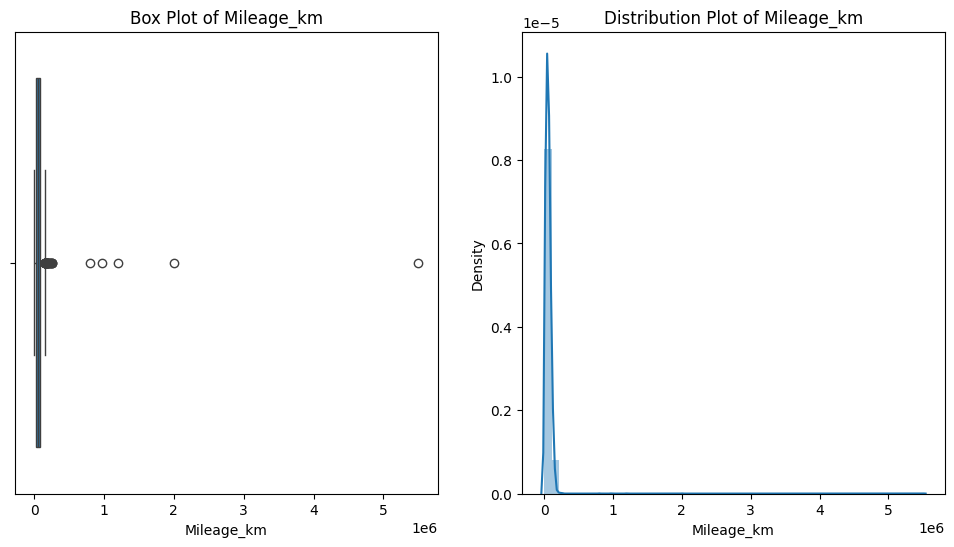

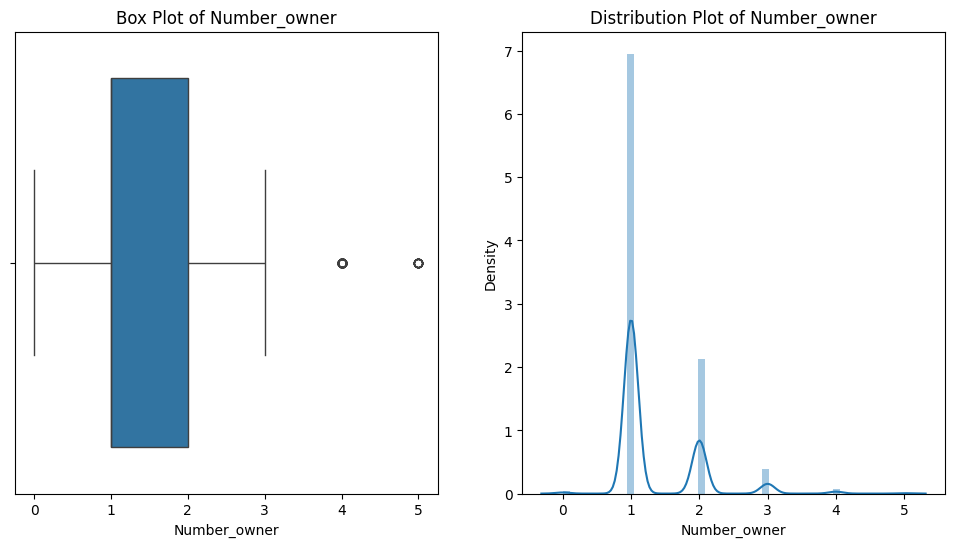

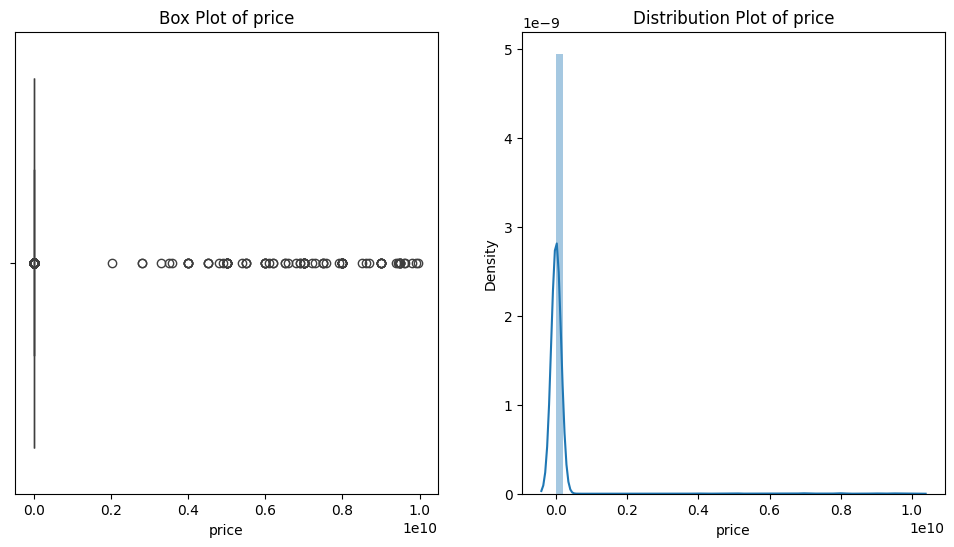

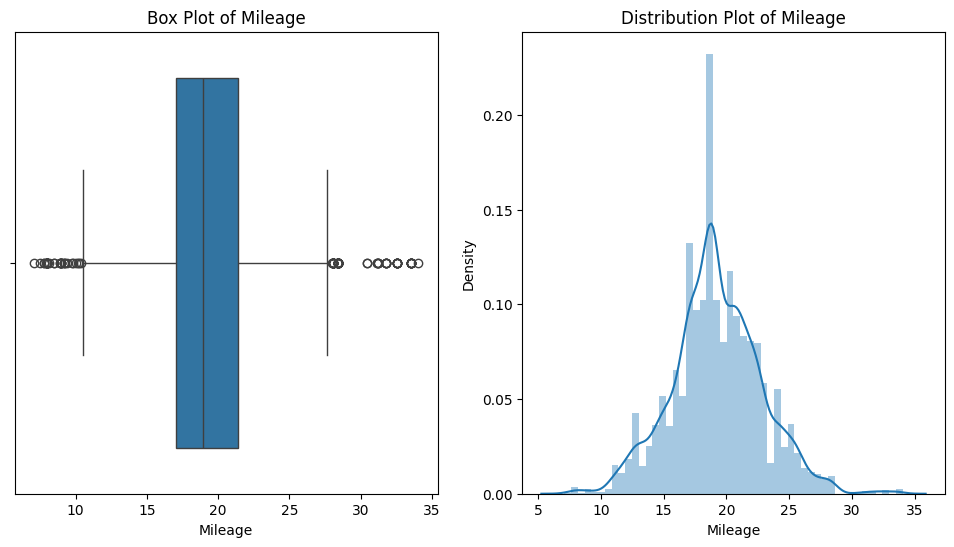

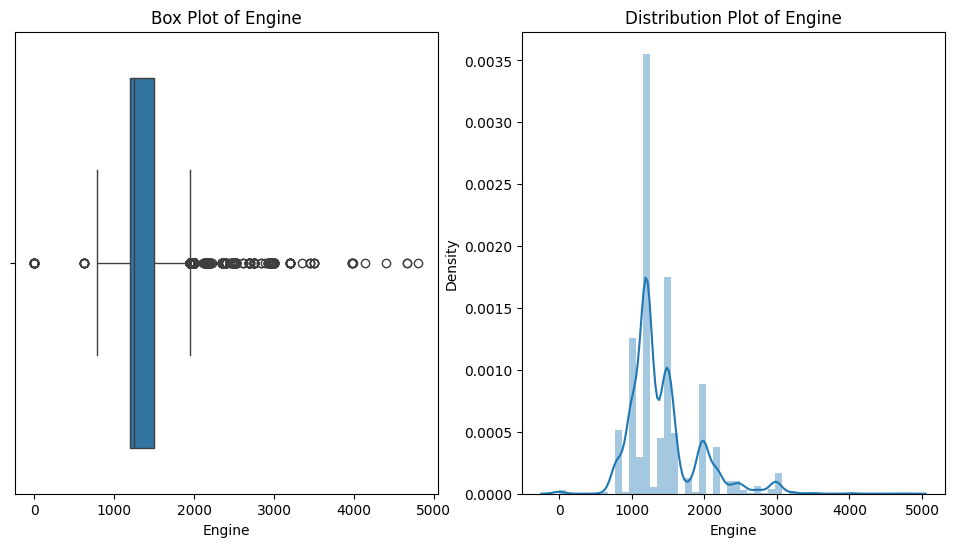

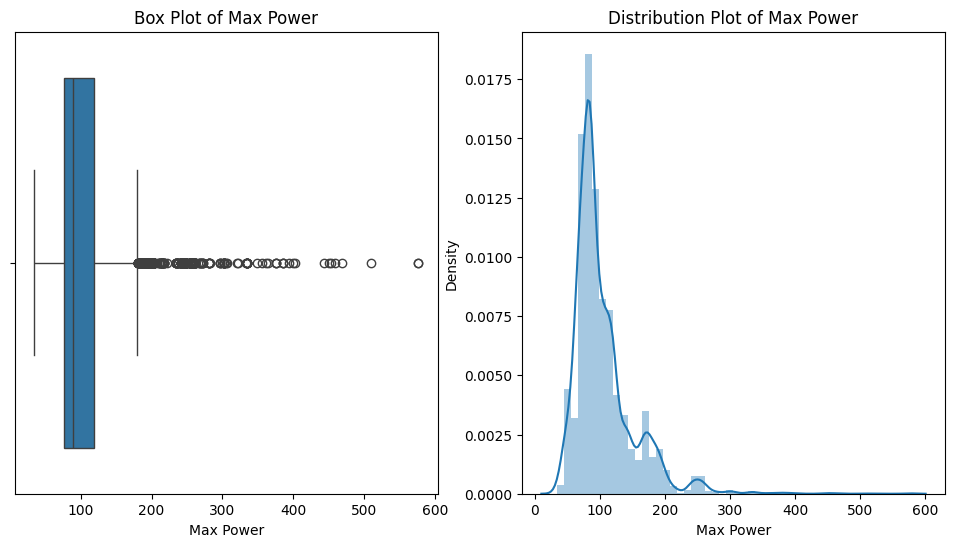

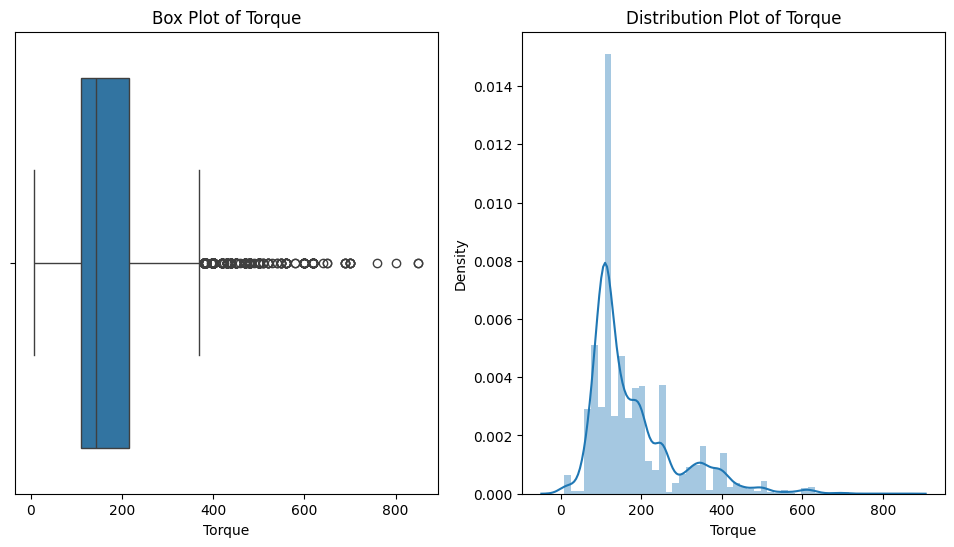

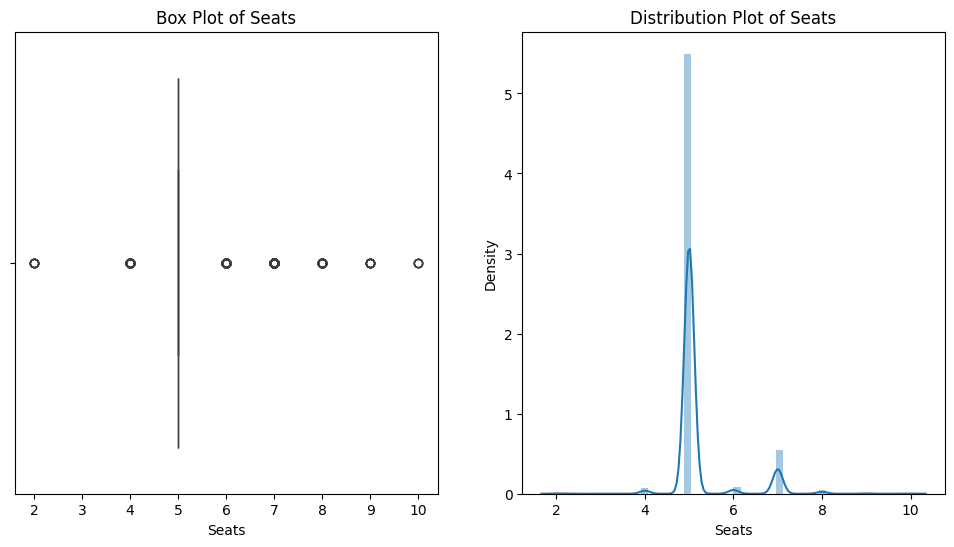

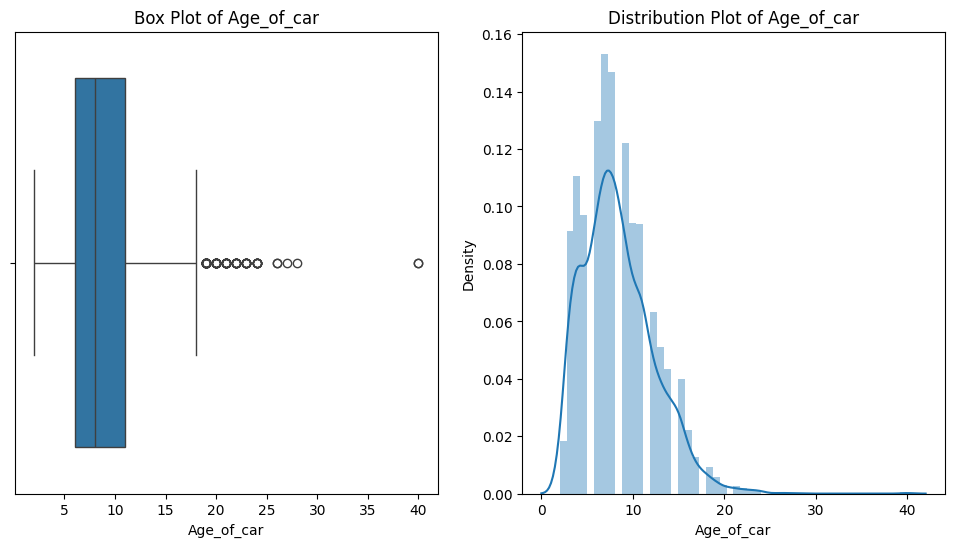

In [ ]:
def plot(df, column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

    plt.subplot(1, 2, 2)
    sns.distplot(df[column])
    plt.title(f'Distribution Plot of {column}')

for i in ['Mileage_km','Number_owner','price','Mileage','Engine','Max Power','Torque','Seats','Age_of_car']:
    plot(df,i)


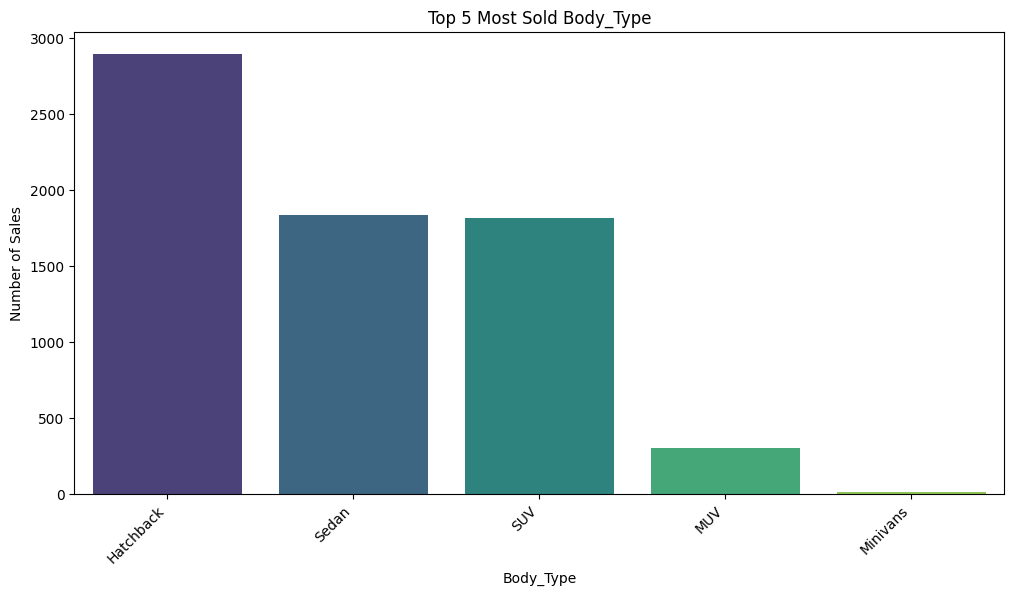

In [ ]:
top_5_cars = df['Body_Type'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cars.index, y=top_5_cars.values, palette='viridis')
plt.title('Top 5 Most Sold Body_Type')
plt.xlabel('Body_Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

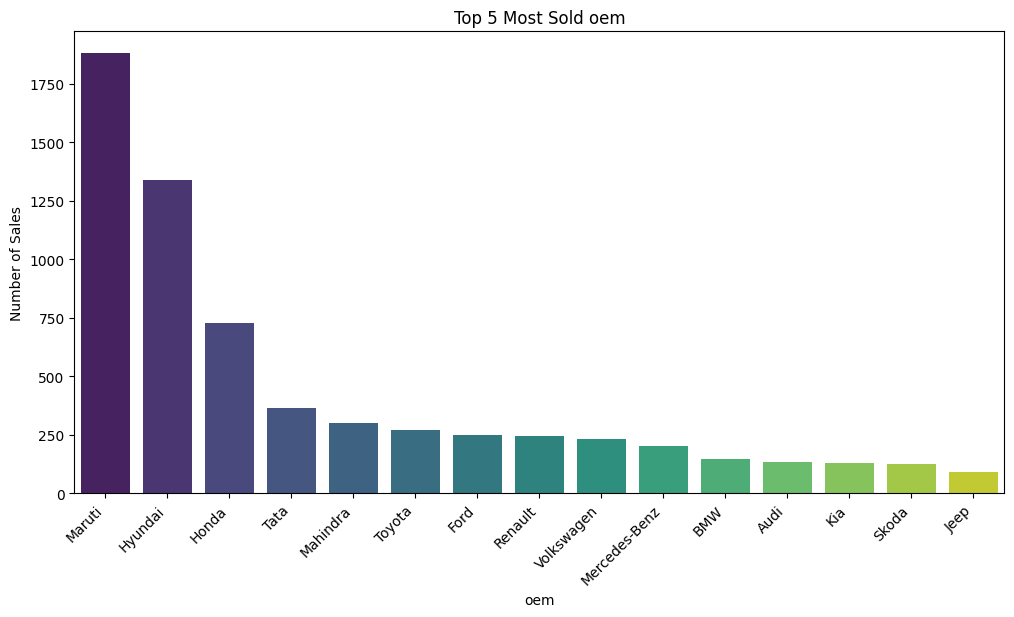

In [ ]:
top_5_cars = df['oem'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cars.index, y=top_5_cars.values, palette='viridis')
plt.title('Top 5 Most Sold oem')
plt.xlabel('oem')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

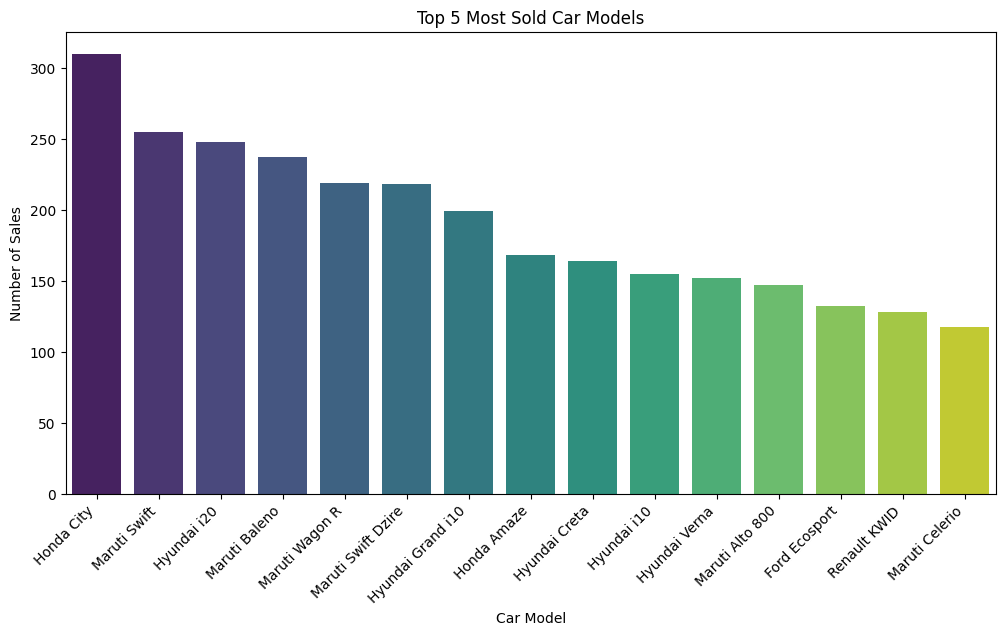

In [ ]:
top_5_cars = df['Car_model'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cars.index, y=top_5_cars.values, palette='viridis')
plt.title('Top 5 Most Sold Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

## Price Comparision

In [ ]:
df.head()

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,Petrol,SUV,20000,Automatic,1,Kia,Kia Sonet,Turbo DCT Anniversary Edition,1150000.0,18.60,998,118.36,172.00,5.0,3
1,Petrol,Minivans,20687,Manual,1,Maruti,Maruti Eeco,7 Seater Standard BSIV,415000.0,15.37,1196,73.00,101.00,7.0,10
2,Petrol,SUV,30000,Manual,1,Nissan,Nissan Magnite,Turbo XV Premium BSVI,750000.0,20.00,999,98.63,160.00,5.0,4
3,Petrol,Hatchback,59247,Manual,1,Hyundai,Hyundai i10,Sportz 1.1L,398000.0,19.81,1086,68.05,99.04,5.0,10
4,Petrol,Hatchback,50000,Manual,1,Honda,Honda Jazz,1.2 VX i VTEC,550000.0,18.70,1199,88.70,110.00,5.0,10


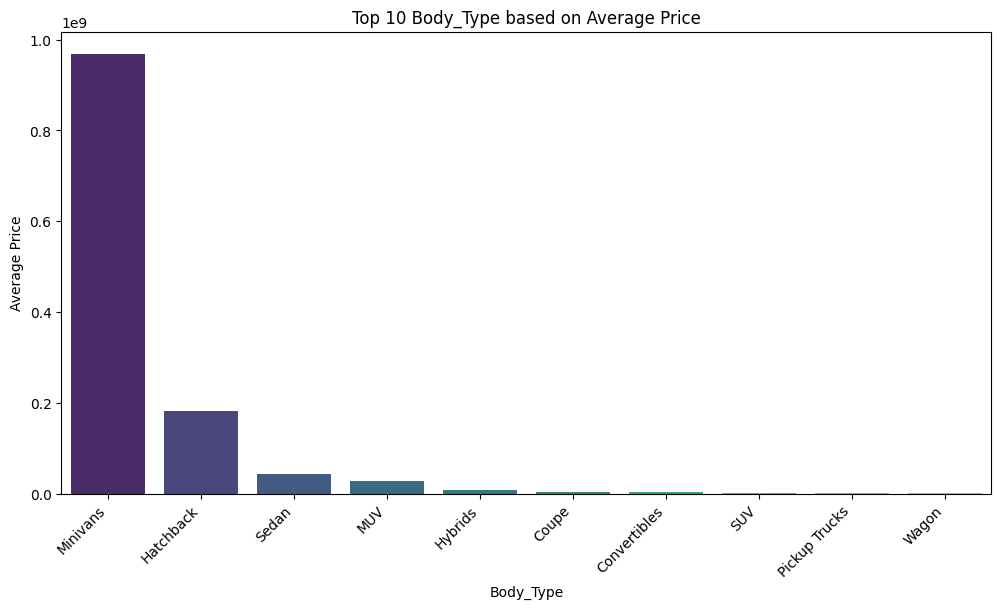

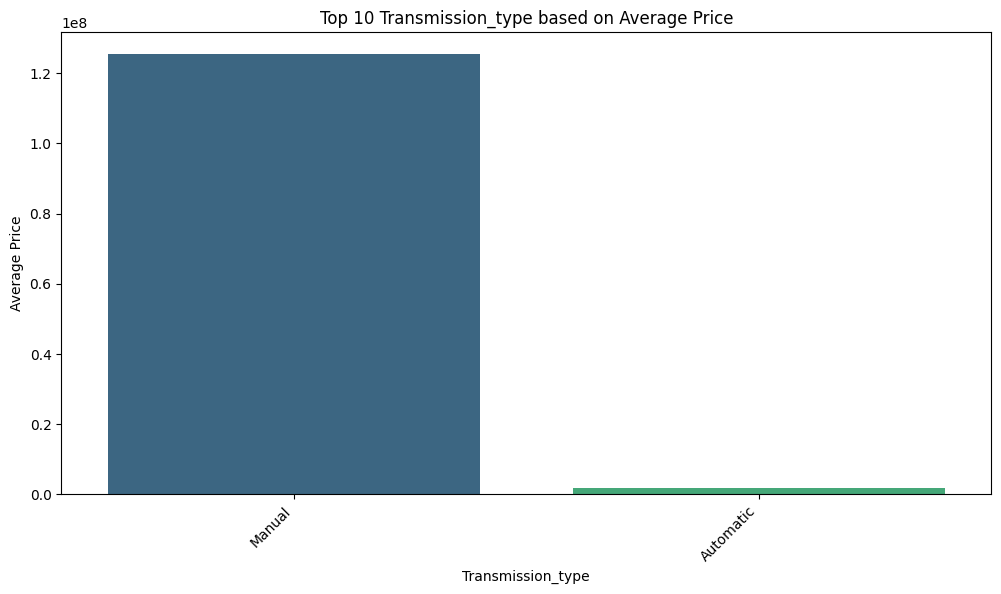

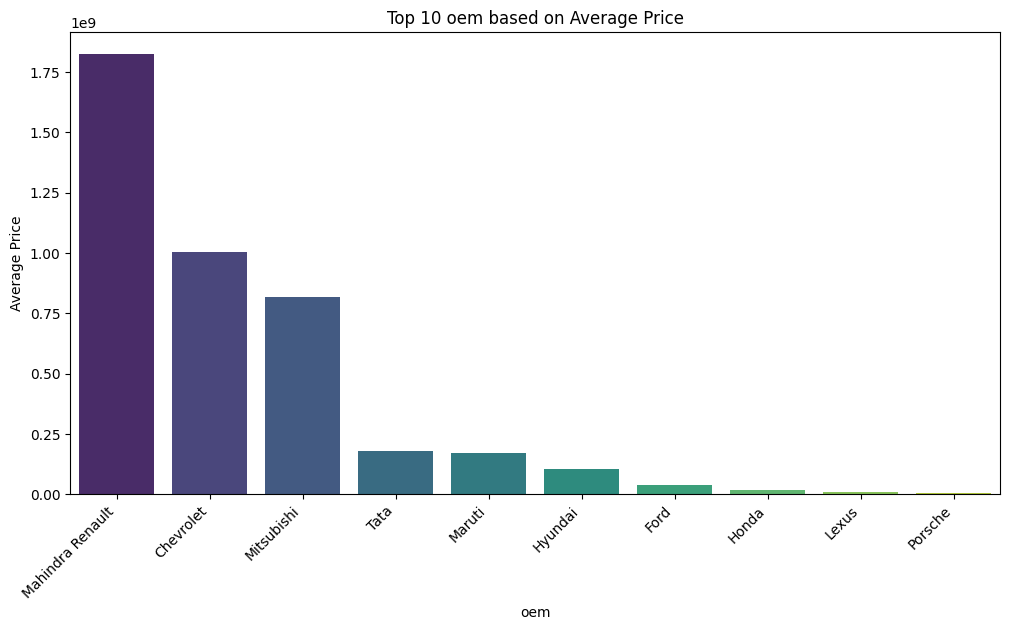

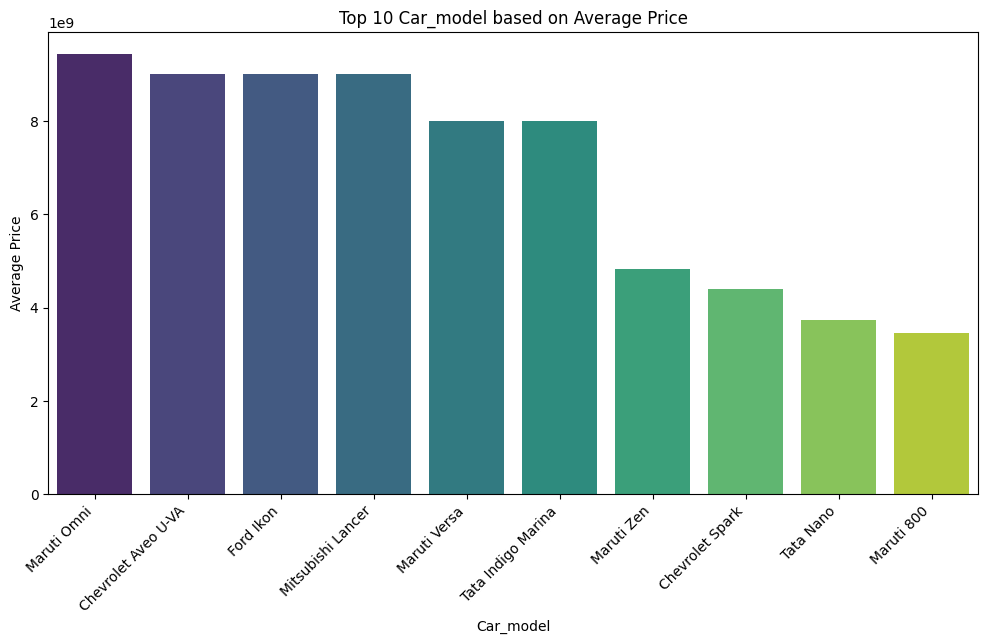

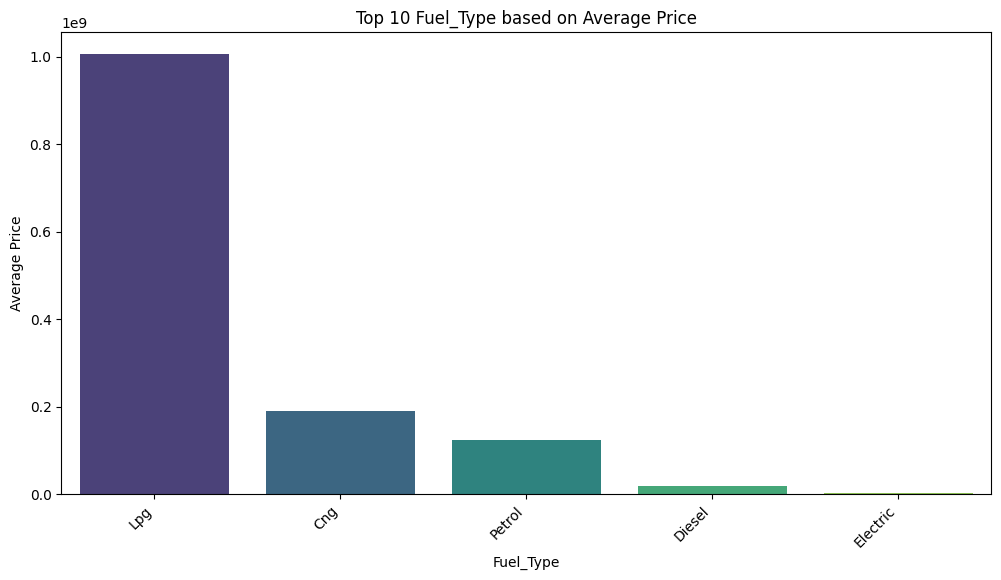

In [ ]:
def plot_top_10_average_price(df, column):
    plt.figure(figsize=(12, 6))
    top_10 = df.groupby(column)['price'].mean().nlargest(10)
    sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
    plt.title(f'Top 10 {column} based on Average Price')
    plt.xlabel(column)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_top_10_average_price(df, 'Body_Type')
plot_top_10_average_price(df, 'Transmission_type')
plot_top_10_average_price(df, 'oem')
plot_top_10_average_price(df, 'Car_model')
plot_top_10_average_price(df, 'Fuel_Type')


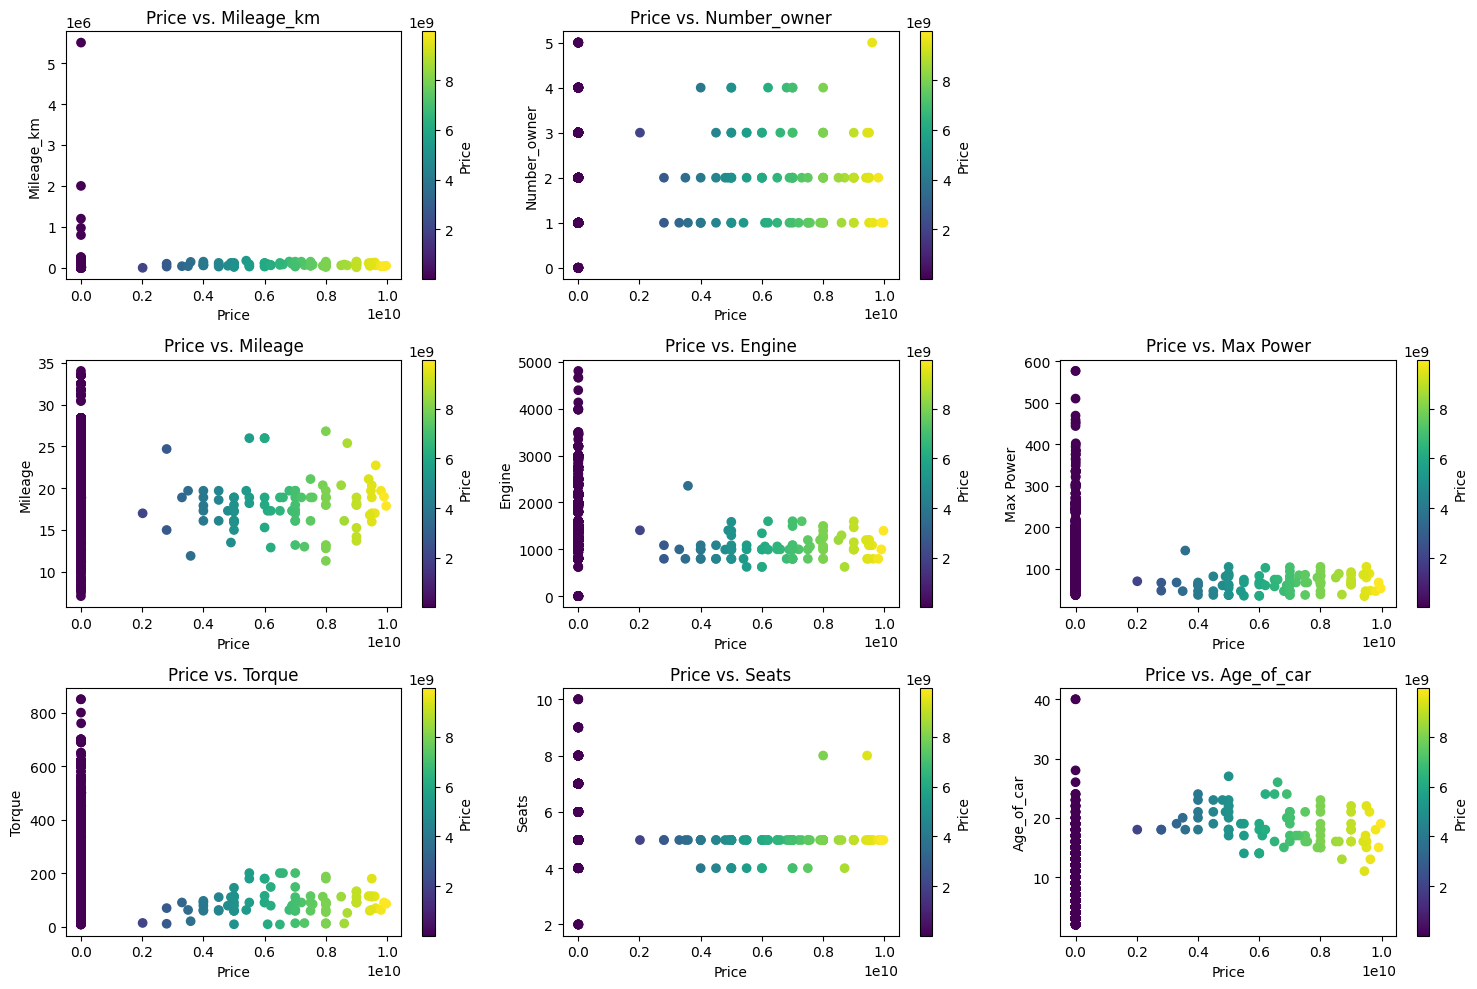

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    if col != 'price':
        plt.subplot(3, 3, i + 1)
        plt.scatter(df['price'], df[col], c=df['price'], cmap='viridis')
        plt.xlabel('Price')
        plt.ylabel(col)
        plt.title(f'Price vs. {col}')
        plt.colorbar(label='Price')

plt.tight_layout()
plt.show()


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=np.number).columns

In [ ]:
car_corr = df[numerical_features].corr()
car_corr

,Mileage_km,Number_owner,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
Mileage_km,1.000000,0.100246,0.033779,0.000900,0.078046,-0.013428,0.043508,0.064822,0.227016
Number_owner,0.100246,1.000000,0.132149,-0.072117,0.038951,-0.035913,-0.031812,0.001273,0.364128
price,0.033779,0.132149,1.000000,-0.038852,-0.082126,-0.089744,-0.090243,-0.039309,0.285033
Mileage,0.000900,-0.072117,-0.038852,1.000000,-0.574739,-0.551813,-0.379991,-0.307437,-0.111395
Engine,0.078046,0.038951,-0.082126,-0.574739,1.000000,0.812379,0.794969,0.402414,0.025912
Max Power,-0.013428,-0.035913,-0.089744,-0.551813,0.812379,1.000000,0.866377,0.162821,-0.152321
Torque,0.043508,-0.031812,-0.090243,-0.379991,0.794969,0.866377,1.000000,0.266711,-0.136718
Seats,0.064822,0.001273,-0.039309,-0.307437,0.402414,0.162821,0.266711,1.000000,-0.016118
Age_of_car,0.227016,0.364128,0.285033,-0.111395,0.025912,-0.152321,-0.136718,-0.016118,1.000000


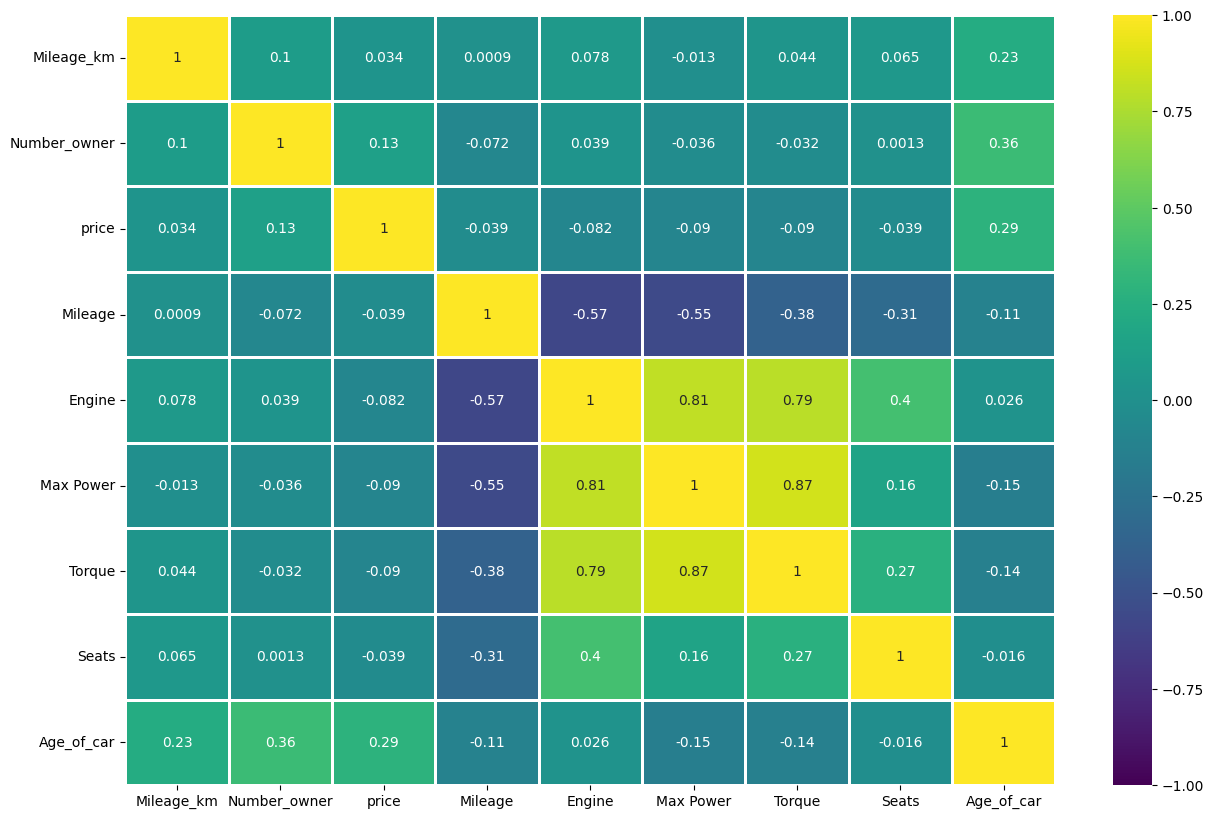

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(car_corr, annot= True, cmap= 'viridis', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

In [ ]:
'''
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame
# and you want to test the relationship between 'Fuel_Type' and 'Transmission_type'

# Create a contingency table
contingency_table = pd.crosstab(df['Fuel_Type'], df['Transmission_type'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Fuel Type and Transmission Type.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Fuel Type and Transmission Type.")


'''


In [ ]:
from scipy.stats import chi2_contingency

test_result = pd.DataFrame({
    'Categorical Features': categorical_features,
    'Hypothesis Result': [
        'Reject Null Hypothesis' if chi2_contingency(pd.crosstab(df['price'], df[feature]))[1] < 0.05
        else 'Fail to Reject Null Hypothesis'
        for feature in categorical_features
    ]
})

test_result


,Categorical Features,Hypothesis Result
0,Fuel_Type,Reject Null Hypothesis
1,Body_Type,Reject Null Hypothesis
2,Transmission_type,Reject Null Hypothesis
3,oem,Reject Null Hypothesis
4,Car_model,Reject Null Hypothesis
5,variantName,Reject Null Hypothesis


In [ ]:
# Treating Outliers capping the Outliers
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_value = df[column].quantile(0.75) + (1.5*iqr)
    lower_value = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_value, upper_value)

outlier(df, 'Mileage_km')
outlier(df, 'price')
outlier(df, 'Mileage')
outlier(df, 'Engine')
outlier(df, 'Max Power')
outlier(df, 'Torque')
outlier(df, 'Seats')
outlier(df, 'Age_of_car')

df

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,oem,Car_model,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,Petrol,SUV,20000,Automatic,1,Kia,Kia Sonet,Turbo DCT Anniversary Edition,1150000.0,18.60,998.0,118.360,172.00,5.0,3.0
1,Petrol,Minivans,20687,Manual,1,Maruti,Maruti Eeco,7 Seater Standard BSIV,415000.0,15.37,1196.0,73.000,101.00,5.0,10.0
2,Petrol,SUV,30000,Manual,1,Nissan,Nissan Magnite,Turbo XV Premium BSVI,750000.0,20.00,999.0,98.630,160.00,5.0,4.0
3,Petrol,Hatchback,59247,Manual,1,Hyundai,Hyundai i10,Sportz 1.1L,398000.0,19.81,1086.0,68.050,99.04,5.0,10.0
4,Petrol,Hatchback,50000,Manual,1,Honda,Honda Jazz,1.2 VX i VTEC,550000.0,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,ZXI BSVI,510000.0,25.24,998.0,65.710,89.00,5.0,3.0
6884,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,LXI,180000.0,22.74,796.0,47.300,69.00,5.0,11.0
6885,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,C 200 CGI Elegance,550000.0,11.74,1796.0,180.475,285.00,5.0,14.0
6886,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,ZXi,140000.0,18.50,1197.0,85.800,114.00,5.0,13.0


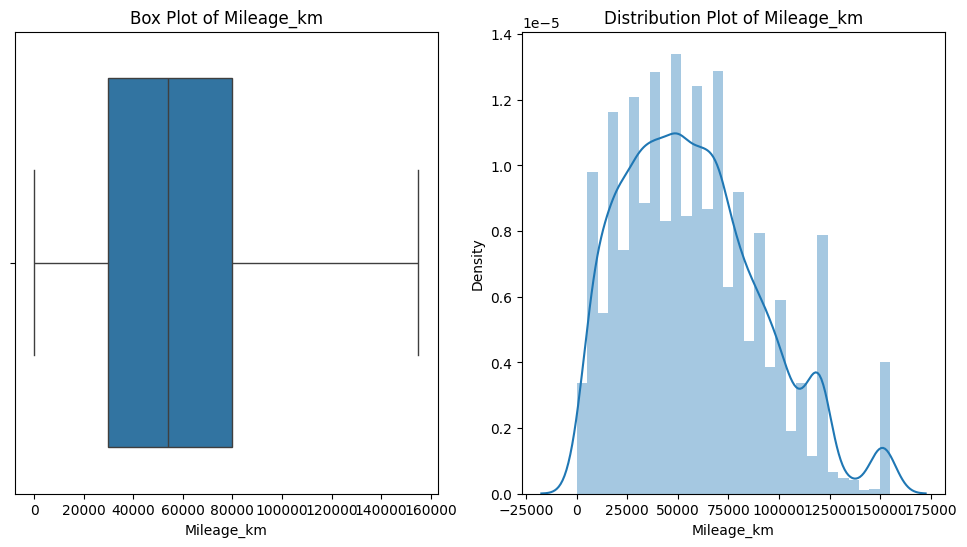

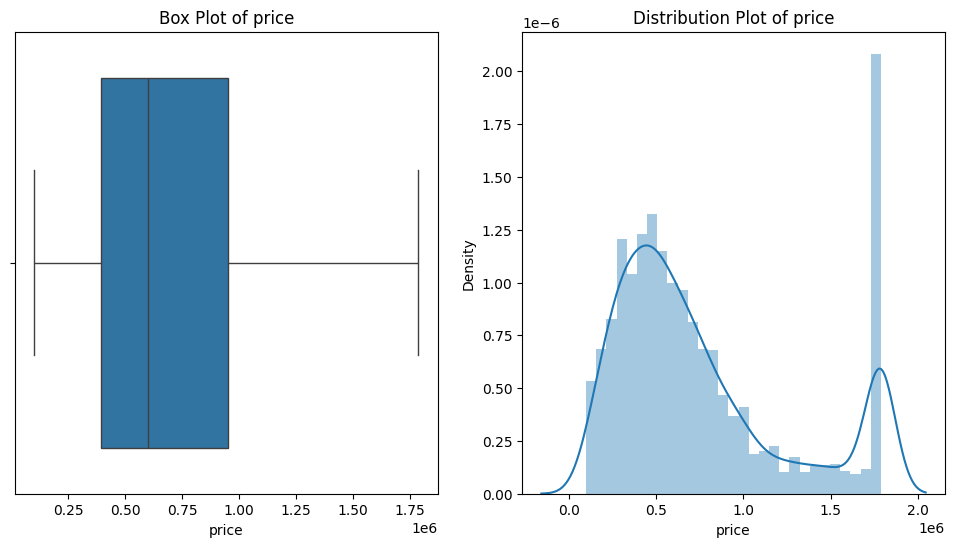

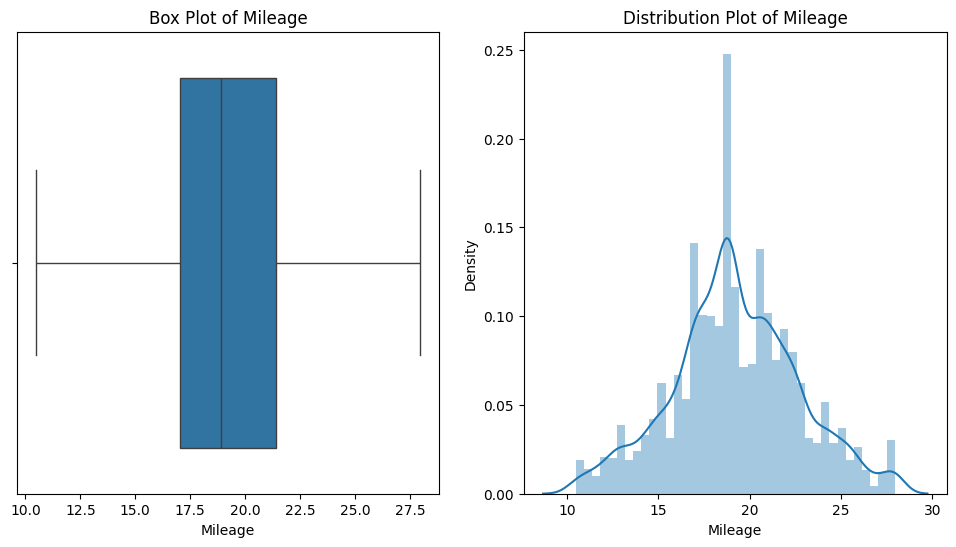

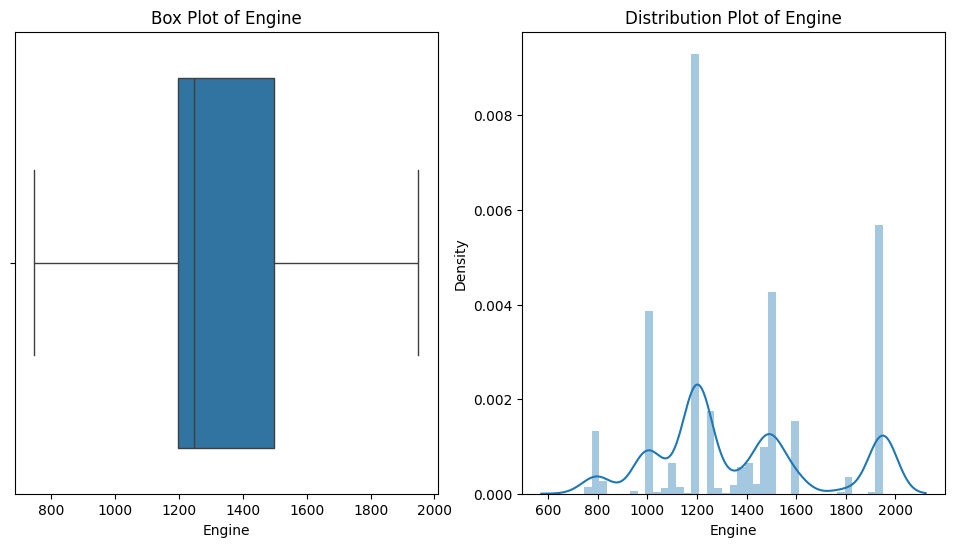

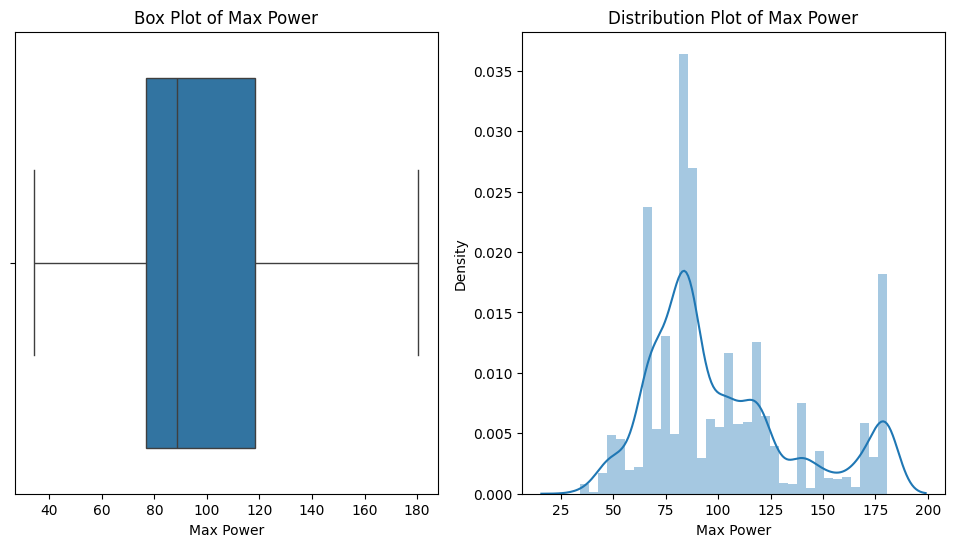

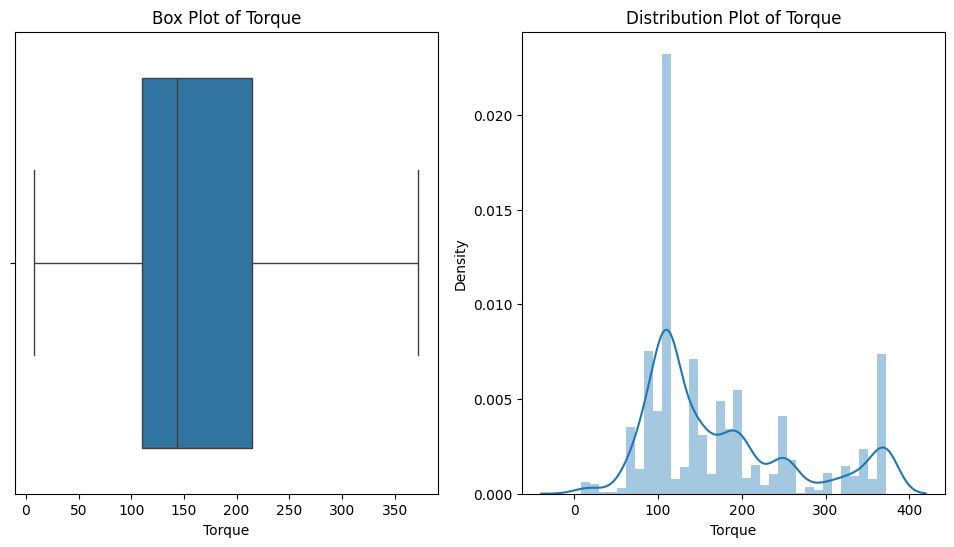

In [ ]:
for i in ['Mileage_km','price','Mileage','Engine','Max Power','Torque',]:
    plot(df,i)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          6888 non-null   object 
 1   Body_Type          6888 non-null   object 
 2   Mileage_km         6888 non-null   int64  
 3   Transmission_type  6888 non-null   object 
 4   Number_owner       6888 non-null   int64  
 5   oem                6888 non-null   object 
 6   Car_model          6888 non-null   object 
 7   variantName        6888 non-null   object 
 8   price              6888 non-null   float64
 9   Mileage            6888 non-null   float64
 10  Engine             6888 non-null   float64
 11  Max Power          6888 non-null   float64
 12  Torque             6888 non-null   float64
 13  Seats              6888 non-null   float64
 14  Age_of_car         6888 non-null   float64
dtypes: float64(7), int64(2), object(6)
memory usage: 807.3+ KB


In [ ]:
df = df.drop(['Car_model','oem','variantName'],axis = 1)

In [ ]:
df

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,Petrol,SUV,20000,Automatic,1,1150000.0,18.60,998.0,118.360,172.00,5.0,3.0
1,Petrol,Minivans,20687,Manual,1,415000.0,15.37,1196.0,73.000,101.00,5.0,10.0
2,Petrol,SUV,30000,Manual,1,750000.0,20.00,999.0,98.630,160.00,5.0,4.0
3,Petrol,Hatchback,59247,Manual,1,398000.0,19.81,1086.0,68.050,99.04,5.0,10.0
4,Petrol,Hatchback,50000,Manual,1,550000.0,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6883,Petrol,Hatchback,10000,Manual,1,510000.0,25.24,998.0,65.710,89.00,5.0,3.0
6884,Petrol,Hatchback,120000,Manual,1,180000.0,22.74,796.0,47.300,69.00,5.0,11.0
6885,Petrol,Sedan,50000,Automatic,3,550000.0,11.74,1796.0,180.475,285.00,5.0,14.0
6886,Petrol,Hatchback,40000,Manual,1,140000.0,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
df['Body_Type'].value_counts()

,count
Body_Type,
Hatchback,2894
Sedan,1837
SUV,1816
MUV,302
Minivans,18
Coupe,9
Convertibles,5
Pickup Trucks,5
Hybrids,1


In [ ]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,4551
Diesel,2209
Cng,92
Electric,22
Lpg,14


In [ ]:
df['Transmission_type'].value_counts()

,count
Transmission_type,
Manual,5039
Automatic,1849


In [ ]:
df

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,Petrol,SUV,20000,Automatic,1,1150000.0,18.60,998.0,118.360,172.00,5.0,3.0
1,Petrol,Minivans,20687,Manual,1,415000.0,15.37,1196.0,73.000,101.00,5.0,10.0
2,Petrol,SUV,30000,Manual,1,750000.0,20.00,999.0,98.630,160.00,5.0,4.0
3,Petrol,Hatchback,59247,Manual,1,398000.0,19.81,1086.0,68.050,99.04,5.0,10.0
4,Petrol,Hatchback,50000,Manual,1,550000.0,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6883,Petrol,Hatchback,10000,Manual,1,510000.0,25.24,998.0,65.710,89.00,5.0,3.0
6884,Petrol,Hatchback,120000,Manual,1,180000.0,22.74,796.0,47.300,69.00,5.0,11.0
6885,Petrol,Sedan,50000,Automatic,3,550000.0,11.74,1796.0,180.475,285.00,5.0,14.0
6886,Petrol,Hatchback,40000,Manual,1,140000.0,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
# df.to_csv('car_df.csv', index=False)

# Encoding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/car_df.csv')

In [ ]:
df

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,Petrol,SUV,20000,Automatic,1,1150000.0,18.60,998.0,118.360,172.00,5.0,3.0
1,Petrol,Minivans,20687,Manual,1,415000.0,15.37,1196.0,73.000,101.00,5.0,10.0
2,Petrol,SUV,30000,Manual,1,750000.0,20.00,999.0,98.630,160.00,5.0,4.0
3,Petrol,Hatchback,59247,Manual,1,398000.0,19.81,1086.0,68.050,99.04,5.0,10.0
4,Petrol,Hatchback,50000,Manual,1,550000.0,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6883,Petrol,Hatchback,10000,Manual,1,510000.0,25.24,998.0,65.710,89.00,5.0,3.0
6884,Petrol,Hatchback,120000,Manual,1,180000.0,22.74,796.0,47.300,69.00,5.0,11.0
6885,Petrol,Sedan,50000,Automatic,3,550000.0,11.74,1796.0,180.475,285.00,5.0,14.0
6886,Petrol,Hatchback,40000,Manual,1,140000.0,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
df['Body_Type'].value_counts()

,count
Body_Type,
Hatchback,2894
Sedan,1837
SUV,1816
MUV,302
Minivans,18
Coupe,9
Convertibles,5
Pickup Trucks,5
Hybrids,1


In [ ]:
# Capping method in Pandas for Encoding
df['Body_Type'] = df['Body_Type'].map({
    'Hatchback': 0,
    'Sedan': 1,
    'SUV': 2,
    'MUV': 3,
    'Minivans': 4,
    'Coupe': 5,
    'Convertibles': 6,
    'Pickup Trucks': 7,
    'Hybrids': 8,
    'Wagon': 9
})

In [ ]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,4551
Diesel,2209
Cng,92
Electric,22
Lpg,14


In [ ]:
# Mapping for Fuel_type
df['Fuel_Type'] = df['Fuel_Type'].map({
    'Petrol': 0,
    'Diesel': 1,
    'Cng': 2,
    'Electric': 3,
    'Lpg': 4
})

In [ ]:
df['Transmission_type'].value_counts()

,count
Transmission_type,
Manual,5039
Automatic,1849


In [ ]:
df['Transmission_type'] = df['Transmission_type'].map({
    'Manual': 0,
    'Automatic': 1
})

In [ ]:
df

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,0,2,20000,1,1,1150000.0,18.60,998.0,118.360,172.00,5.0,3.0
1,0,4,20687,0,1,415000.0,15.37,1196.0,73.000,101.00,5.0,10.0
2,0,2,30000,0,1,750000.0,20.00,999.0,98.630,160.00,5.0,4.0
3,0,0,59247,0,1,398000.0,19.81,1086.0,68.050,99.04,5.0,10.0
4,0,0,50000,0,1,550000.0,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6883,0,0,10000,0,1,510000.0,25.24,998.0,65.710,89.00,5.0,3.0
6884,0,0,120000,0,1,180000.0,22.74,796.0,47.300,69.00,5.0,11.0
6885,0,1,50000,1,3,550000.0,11.74,1796.0,180.475,285.00,5.0,14.0
6886,0,0,40000,0,1,140000.0,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
'''
Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['Body_Type', 'Fuel_Type', 'Transmission_type']:
    final_car_df[column] = le.fit_transform(final_car_df[column])



# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = [col for col in final_car_df.columns if col not in ['Body_Type', 'Fuel_Type', 'Transmission_type','price']]
final_car_df[columns_to_scale] = scaler.fit_transform(final_car_df[columns_to_scale])


'''

"\nLabel Encoder\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nfor column in ['Body_Type', 'Fuel_Type', 'Transmission_type']:\n    final_car_df[column] = le.fit_transform(final_car_df[column])\n\n\n\n# Standard Scaler\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ncolumns_to_scale = [col for col in final_car_df.columns if col not in ['Body_Type', 'Fuel_Type', 'Transmission_type','price']]\nfinal_car_df[columns_to_scale] = scaler.fit_transform(final_car_df[columns_to_scale])\n\n\n"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          6888 non-null   int64  
 1   Body_Type          6888 non-null   int64  
 2   Mileage_km         6888 non-null   int64  
 3   Transmission_type  6888 non-null   int64  
 4   Number_owner       6888 non-null   int64  
 5   price              6888 non-null   float64
 6   Mileage            6888 non-null   float64
 7   Engine             6888 non-null   float64
 8   Max Power          6888 non-null   float64
 9   Torque             6888 non-null   float64
 10  Seats              6888 non-null   float64
 11  Age_of_car         6888 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 645.9 KB


In [ ]:
df

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,0,2,20000,1,1,1150000.0,18.60,998.0,118.360,172.00,5.0,3.0
1,0,4,20687,0,1,415000.0,15.37,1196.0,73.000,101.00,5.0,10.0
2,0,2,30000,0,1,750000.0,20.00,999.0,98.630,160.00,5.0,4.0
3,0,0,59247,0,1,398000.0,19.81,1086.0,68.050,99.04,5.0,10.0
4,0,0,50000,0,1,550000.0,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6883,0,0,10000,0,1,510000.0,25.24,998.0,65.710,89.00,5.0,3.0
6884,0,0,120000,0,1,180000.0,22.74,796.0,47.300,69.00,5.0,11.0
6885,0,1,50000,1,3,550000.0,11.74,1796.0,180.475,285.00,5.0,14.0
6886,0,0,40000,0,1,140000.0,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
df.columns

Index(['Fuel_Type', 'Body_Type', 'Mileage_km', 'Transmission_type',
       'Number_owner', 'price', 'Mileage', 'Engine', 'Max Power', 'Torque',
       'Seats', 'Age_of_car'],
      dtype='object')

In [ ]:
# df.to_csv('encoded_car_df.csv', index=False)

# Choosing Best Model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/3.CarDekho/encoded_car_df.csv')

In [ ]:
df

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,price,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,0,2,20000,1,1,1150000.0,18.60,998.0,118.360,172.00,5.0,3.0
1,0,4,20687,0,1,415000.0,15.37,1196.0,73.000,101.00,5.0,10.0
2,0,2,30000,0,1,750000.0,20.00,999.0,98.630,160.00,5.0,4.0
3,0,0,59247,0,1,398000.0,19.81,1086.0,68.050,99.04,5.0,10.0
4,0,0,50000,0,1,550000.0,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6883,0,0,10000,0,1,510000.0,25.24,998.0,65.710,89.00,5.0,3.0
6884,0,0,120000,0,1,180000.0,22.74,796.0,47.300,69.00,5.0,11.0
6885,0,1,50000,1,3,550000.0,11.74,1796.0,180.475,285.00,5.0,14.0
6886,0,0,40000,0,1,140000.0,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

## Splitting the Data

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,0,2,20000,1,1,18.60,998.0,118.360,172.00,5.0,3.0
1,0,4,20687,0,1,15.37,1196.0,73.000,101.00,5.0,10.0
2,0,2,30000,0,1,20.00,999.0,98.630,160.00,5.0,4.0
3,0,0,59247,0,1,19.81,1086.0,68.050,99.04,5.0,10.0
4,0,0,50000,0,1,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
6883,0,0,10000,0,1,25.24,998.0,65.710,89.00,5.0,3.0
6884,0,0,120000,0,1,22.74,796.0,47.300,69.00,5.0,11.0
6885,0,1,50000,1,3,11.74,1796.0,180.475,285.00,5.0,14.0
6886,0,0,40000,0,1,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
y

,price
0,1150000.0
1,415000.0
2,750000.0
3,398000.0
4,550000.0
...,...
6883,510000.0
6884,180000.0
6885,550000.0
6886,140000.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5510, 11)
(1378, 11)
(5510,)
(1378,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the training and testing sets
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate the model (example metrics)
print("Linear Regression Model Evaluation:")
print("Training Set:")
print(f"R^2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print("\nTesting Set:")
print(f"R^2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")


Linear Regression Model Evaluation:
Training Set:
R^2 Score: 0.6687160109103318
Mean Absolute Error: 171547.449131423
Mean Squared Error: 84314390200.94711

Testing Set:
R^2 Score: 0.6895757693228329
Mean Absolute Error: 162634.51510439228
Mean Squared Error: 73432273507.26675


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Predict on the training and testing sets
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Evaluate the model
print("\nDecision Tree Regressor Model Evaluation:")
print("Training Set:")
print(f"R^2 Score: {r2_score(y_train, y_pred_train_dt)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train_dt)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train_dt)}")
print("\nTesting Set:")
print(f"R^2 Score: {r2_score(y_test, y_pred_test_dt)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test_dt)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test_dt)}")



Decision Tree Regressor Model Evaluation:
Training Set:
R^2 Score: 0.9975251657159876
Mean Absolute Error: 2284.286146400484
Mean Squared Error: 629864860.2918936

Testing Set:
R^2 Score: 0.6768821137652121
Mean Absolute Error: 129345.76076439282
Mean Squared Error: 76435015866.26653


## RandomForestRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict on the training and testing sets
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Regressor Model Evaluation:")
print("Training Set:")
print(f"R^2 Score: {r2_score(y_train, y_pred_train_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train_rf)}")
print("\nTesting Set:")
print(f"R^2 Score: {r2_score(y_test, y_pred_test_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test_rf)}")



Random Forest Regressor Model Evaluation:
Training Set:
R^2 Score: 0.9742226224122036
Mean Absolute Error: 41135.11506208049
Mean Squared Error: 6560546068.848331

Testing Set:
R^2 Score: 0.8419745132956586
Mean Absolute Error: 100867.56979001084
Mean Squared Error: 37381652635.42255


## XgBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict on the training and testing sets
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost Regressor Model Evaluation:")
print("Training Set:")
print(f"R^2 Score: {r2_score(y_train, y_pred_train_xgb)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train_xgb)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train_xgb)}")
print("\nTesting Set:")
print(f"R^2 Score: {r2_score(y_test, y_pred_test_xgb)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test_xgb)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test_xgb)}")



XGBoost Regressor Model Evaluation:
Training Set:
R^2 Score: 0.975977108588401
Mean Absolute Error: 51782.93576877269
Mean Squared Error: 6114015488.035868

Testing Set:
R^2 Score: 0.8008973062257885
Mean Absolute Error: 107453.78194734217
Mean Squared Error: 47098654101.091995


1. R² Score (Higher is better) – Measures how well the model explains variance in the data.
2. Mean Absolute Error (MAE) (Lower is better) – Average absolute differences between actual and predicted values.
3. Mean Squared Error (MSE) (Lower is better) – Measures error magnitude, penalizing large errors more than MAE.







In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

# Evaluate the best model
y_pred_test_best_rf = best_rf_model.predict(X_test)

print("\nRandom Forest Regressor (Tuned) Model Evaluation:")
print("Testing Set:")
print(f"R^2 Score: {r2_score(y_test, y_pred_test_best_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test_best_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test_best_rf)}")


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest Regressor (Tuned) Model Evaluation:
Testing Set:
R^2 Score: 0.8390674512022231
Mean Absolute Error: 102439.4248373973
Mean Squared Error: 38069331487.9467


In [ ]:
X

,Fuel_Type,Body_Type,Mileage_km,Transmission_type,Number_owner,Mileage,Engine,Max Power,Torque,Seats,Age_of_car
0,0,2,20000,1,1,18.60,998.0,118.360,172.00,5.0,3.0
1,0,4,20687,0,1,15.37,1196.0,73.000,101.00,5.0,10.0
2,0,2,30000,0,1,20.00,999.0,98.630,160.00,5.0,4.0
3,0,0,59247,0,1,19.81,1086.0,68.050,99.04,5.0,10.0
4,0,0,50000,0,1,18.70,1199.0,88.700,110.00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
6883,0,0,10000,0,1,25.24,998.0,65.710,89.00,5.0,3.0
6884,0,0,120000,0,1,22.74,796.0,47.300,69.00,5.0,11.0
6885,0,1,50000,1,3,11.74,1796.0,180.475,285.00,5.0,14.0
6886,0,0,40000,0,1,18.50,1197.0,85.800,114.00,5.0,13.0


In [ ]:
y

,price
0,1150000.0
1,415000.0
2,750000.0
3,398000.0
4,550000.0
...,...
6883,510000.0
6884,180000.0
6885,550000.0
6886,140000.0


In [ ]:
#1169394
#1150000

In [ ]:
#  0	2	20000	1	1	18.60	998.0	118.360	172.00	5.0	3.0 --------> 1150000.0

In [ ]:
input_data = np.array([[0,2,20000,1,1,18.60,998.0,118.360,172.00,5.0,3.0]])
prediction = best_rf_model.predict(input_data)

print("Predicted Price:", prediction[0])


Predicted Price: 1169394.8561507934


# Saving it in Pickle File

In [ ]:
import pickle
filename = 'best_model.pkl'
pickle.dump(best_rf_model, open(filename, 'wb'))

In [ ]:
# Load the model from the pickle file
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)